<a href="https://colab.research.google.com/github/Dunila/Restaurants-rating/blob/main/Restaurantrs1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from datetime import datetime

In [ ]:
from dateutil import parser

In [ ]:
from collections import Counter

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Import data

In [ ]:
!kaggle datasets download -d damienbeneschi/krakow-ta-restaurans-data-raw

Dataset URL: https://www.kaggle.com/datasets/damienbeneschi/krakow-ta-restaurans-data-raw
License(s): unknown
  0% 0.00/7.37M [00:00<?, ?B/s]
100% 7.37M/7.37M [00:00<00:00, 77.8MB/s]


In [ ]:
!unzip /content/krakow-ta-restaurans-data-raw.zip

Archive:  /content/krakow-ta-restaurans-data-raw.zip
  inflating: TA_restaurants_curated.csv  


In [ ]:
data = pd.read_csv("/content/TA_restaurants_curated.csv")

In [ ]:
data.head()

Unnamed: 0                        Name       City  \
0           0  Martine of Martine's Table  Amsterdam   
1           1         De Silveren Spiegel  Amsterdam   
2           2                     La Rive  Amsterdam   
3           3                    Vinkeles  Amsterdam   
4           4   Librije's Zusje Amsterdam  Amsterdam   

                                       Cuisine Style  Ranking  Rating  \
0                    ['French', 'Dutch', 'European']      1.0     5.0   
1  ['Dutch', 'European', 'Vegetarian Friendly', '...      2.0     4.5   
2  ['Mediterranean', 'French', 'International', '...      3.0     4.5   
3  ['French', 'European', 'International', 'Conte...      4.0     5.0   
4  ['Dutch', 'European', 'International', 'Vegeta...      5.0     4.5   

  Price Range  Number of Reviews  \
0    $$ - $$$              136.0   
1        $$$$              812.0   
2        $$$$              567.0   
3        $$$$              564.0   
4        $$$$              316.0   

                                             Reviews  \
0  [['Just like home', 'A Warm Welcome to Wintry ...   
1  [['Great food and staff', 'just perfect'], ['0...   
2  [['Satisfaction', 'Delicious old school restau...   
3  [['True five star dinner', 'A superb evening o...   
4  [['Best meal.... EVER', 'super food experience...   

                                              URL_TA      ID_TA  
0  /Restaurant_Review-g188590-d11752080-Reviews-M...  d11752080  
1  /Restaurant_Review-g188590-d693419-Reviews-De_...    d693419  
2  /Restaurant_Review-g188590-d696959-Reviews-La_...    d696959  
3  /Restaurant_Review-g188590-d1239229-Reviews-Vi...   d1239229  
4  /Restaurant_Review-g188590-d6864170-Reviews-Li...   d6864170

In [ ]:
data.shape

(125527, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         125527 non-null  int64  
 1   Name               125527 non-null  object 
 2   City               125527 non-null  object 
 3   Cuisine Style      94176 non-null   object 
 4   Ranking            115876 non-null  float64
 5   Rating             115897 non-null  float64
 6   Price Range        77672 non-null   object 
 7   Number of Reviews  108183 non-null  float64
 8   Reviews            115911 non-null  object 
 9   URL_TA             125527 non-null  object 
 10  ID_TA              125527 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 10.5+ MB


# EDA

Columns

- Name: name of the restaurant

- City: city location of the restaurant

- Cuisine Style: cuisine style(s) of the restaurant, in a Python list object (94 046 non-null)

- Ranking: rank of the restaurant among the total number of restaurants in the city as a float object (115 645 non-null)

- Rating: rate of the restaurant on a scale from 1 to 5, as a float object (115 658 non-null)

- Price Range: price range of the restaurant among 3 categories , as a categorical type (77 555 non-null)

- Number of Reviews: number of reviews that customers have let to the restaurant, as a float object (108 020 non-null)

- Reviews: 2 reviews that are displayed on the restaurants scrolling page of the city, as a list of list object where the first list contains the 2 reviews, and the second le dates when these reviews were written (115 673 non-null)

- URL_TA: part of the URL of the detailed restaurant page that comes after 'www.tripadvisor.com' as a string object (124 995 non-null)

- ID_TA: identification of the restaurant in the TA database constructed a one letter and a number (124 995 non-null)

## Unnamed: 0

So, we can see column "Unnamed: 0" thats seems to be a restaurant id in original dataset. This atribute is meaningless, we can drop it

 ## Name

In [ ]:
data["Name"].nunique()

111927

In [ ]:
data["Name"].shape[0] - data["Name"].isna().sum() - data["Name"].nunique()

13600

In [ ]:
data["Name"].sample(10)

8681       La Vermuteria Del Tano
2627               Snackbar Ernos
102603              La Petaudiere
112559     La Gallina Capricciosa
9         Rob Wigboldus Vishandel
112654                     Dorsia
72214              Dama de Trebol
92939                  Le Discret
83358                     Harmony
23925                Lunch Garden
Name: Name, dtype: object

"Name" atribute could serve for NLP analysis(for example we could analyze on which words are the most inviting and the most unpleasant). However for now it is unnecessary. We need to begin with some baseline

## City

In [ ]:
data["City"].nunique()

31

In [ ]:
data["City"].isna().sum()

0

<Axes: title={'center': 'Number of restaurants per city'}, xlabel='count', ylabel='City'>

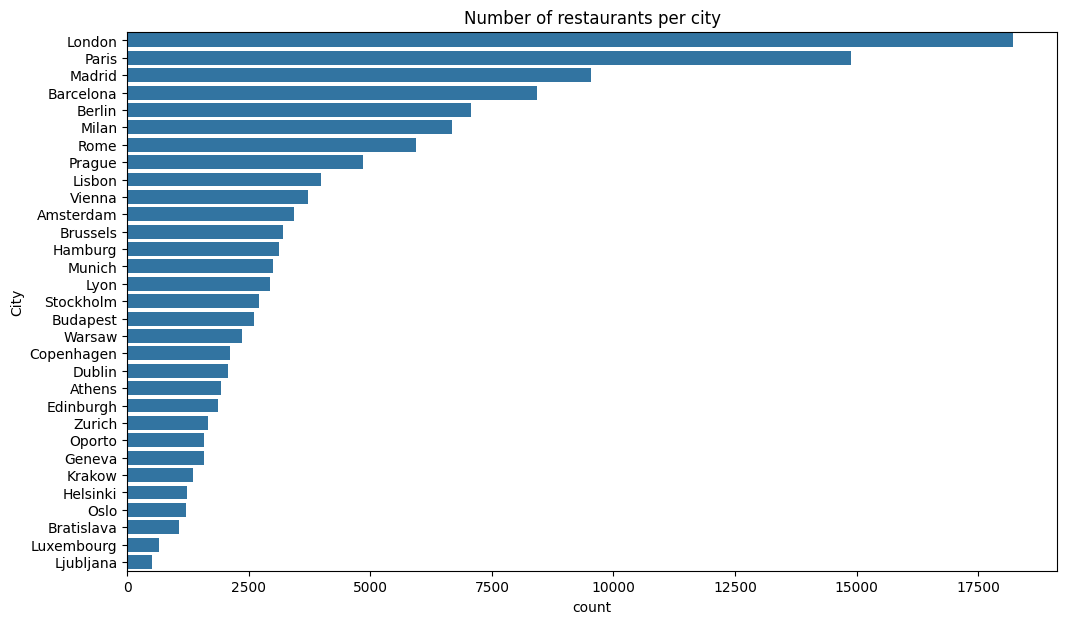

In [ ]:
plt.figure(figsize=(12, 7))
plt.title("Number of restaurants per city")
sns.countplot(data=data, y="City", order=data["City"].value_counts().index)

**Resume:**
  "City" is categorical variable - best solution is to one-encode this atribute. "City" has not null values. Else, we can add some new features like "population of the city", and "is this city a capital?"

## Cuisine Style

In [ ]:
data["Cuisine Style"].isna().sum()

31351

In [ ]:
data["Cuisine Style"].isna().sum() / data.shape[0]

0.24975503278179195

In [ ]:
data["Cuisine Style"].nunique()

20971

In [ ]:
data["Cuisine Style"].head()

0                      ['French', 'Dutch', 'European']
1    ['Dutch', 'European', 'Vegetarian Friendly', '...
2    ['Mediterranean', 'French', 'International', '...
3    ['French', 'European', 'International', 'Conte...
4    ['Dutch', 'European', 'International', 'Vegeta...
Name: Cuisine Style, dtype: object

In [ ]:
data.loc[1, "Cuisine Style"]

"['Dutch', 'European', 'Vegetarian Friendly', 'Gluten Free Options']"

In [ ]:
data[(data["Cuisine Style"] == "") |
     (data["Cuisine Style"] == "[]") |
     (data["Cuisine Style"] == "[[]]") |
     (data["Cuisine Style"] == "['']") |
     (data["Cuisine Style"] == "[") |
     (data["Cuisine Style"] == "[[]")].shape[0]

0

**Brief Resume:**
  "Cuisine Style" is set-valued categorical feature in one string. There are quarter of them with nulls. For now we have discovered that there are no objects with empty set or string, so we can parse this feature and one-encode cuisines styles. Then we can analyze each cuisine style and decide how prepare these features to model

In [ ]:
d = data[data["Cuisine Style"].notna()]["Cuisine Style"]

In [ ]:
d.head()

0                      ['French', 'Dutch', 'European']
1    ['Dutch', 'European', 'Vegetarian Friendly', '...
2    ['Mediterranean', 'French', 'International', '...
3    ['French', 'European', 'International', 'Conte...
4    ['Dutch', 'European', 'International', 'Vegeta...
Name: Cuisine Style, dtype: object

In [ ]:
d.shape

(94176,)

In [ ]:
t_list = d.str.findall(r"'(\b.*?\b)'").tolist()

In [ ]:
def list_unarch(list_of_lists):
    result=[]
    for lst in list_of_lists:
      result.extend(lst)
    return result

In [ ]:
tmp = Counter(list_unarch(t_list))
tmpd = pd.DataFrame(data={"Cuisine": tmp.keys(), "Count": tmp.values()}).sort_values("Count", ascending=False)

<Axes: title={'center': 'Number of restaurants per cuisine'}, xlabel='Count', ylabel='Cuisine'>

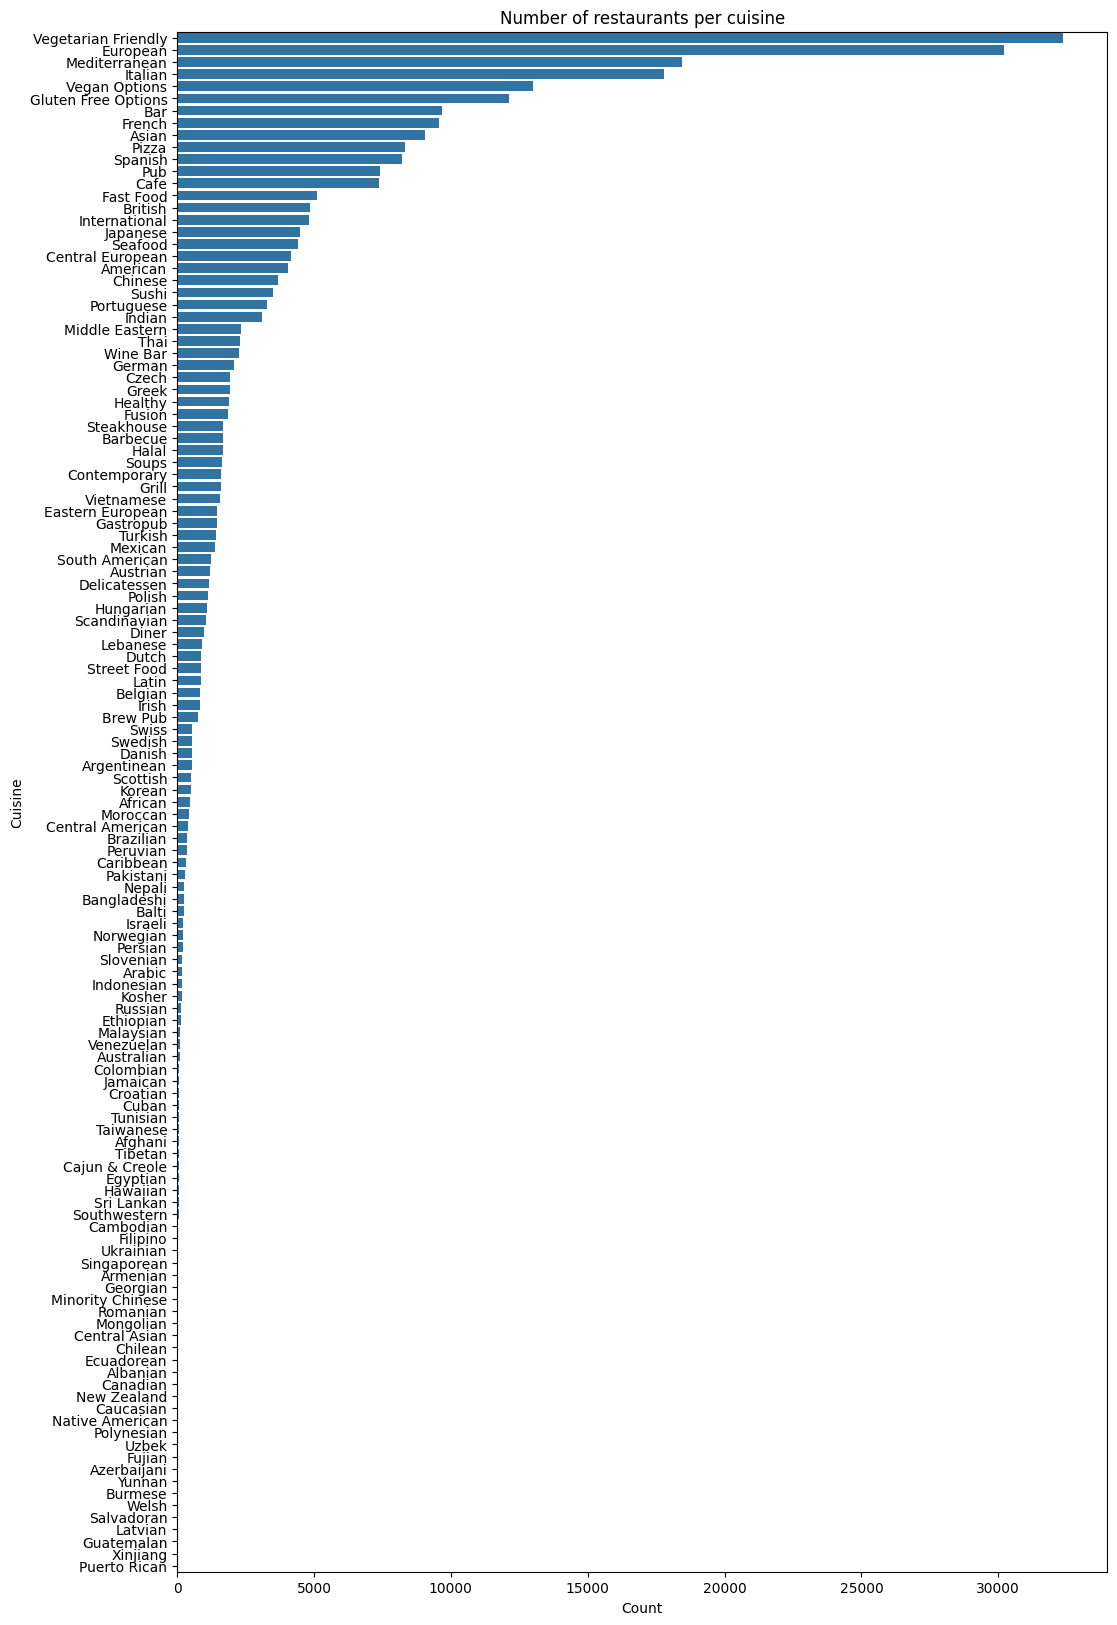

In [ ]:
plt.figure(figsize=(12, 20))
plt.title("Number of restaurants per cuisine")
sns.barplot(data=tmpd, y="Cuisine", x="Count")

We can highlight few groups of values:
- National cuisine such as Italian, Franch, Spanish. It is most common type, so better to take most common styles. And local styles appeares in researched cities.
- International such as European, Mediterranian. I'd like to save them
- Styles dependes on products in dishes such as "Vegeterian friendly", "Halal". Better to save them all, moreover "Vegeterian friendly", "Vegan options", "Gluten Free options" are most common
- Specialization such as "Pizza", "Sushi", "Bar", "Cafe". Better to keep them all
- Modern cusine "Fusion", "Contemporary". Could be combined into one feature depending on correlation betweeen appearence of them iin same objects.

In [ ]:
cuisines = tmpd.loc[:25, "Cuisine"]
cusines = cuisines.tolist()
cusines.extend(["Halal", "Soups", "Contemporary", "Grill", "Eastern European", "Gastropub", "Austrian", "Polish", "Diner", "Scandinavian", "Dutch", "Street Food", "Belgian", "Irish", "Swiss", "Swedish", "Danish", "African", "Slovenian", "Kosher"])
len(cusines)

54

**Resume:**
We can one-hot encode 54 values of this faeture. Also we could add feature "number of cuisines" and "was_Nan", to represent 0,23 of initial dataset

In [ ]:
#Slovak, Hungarian, Finish

## Price Range

In [ ]:
data["Price Range"].isna().sum(), data["Price Range"].isna().sum() / data.shape[0]

(47855, 0.3812327228405044)

In [ ]:
data["Price Range"].nunique()

3

In [ ]:
data["Price Range"].unique()

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

In [ ]:
data["Price Range"] = data["Price Range"].replace({"$$$$": 4, "$$ - $$$": 2.5, "$": 1})

In [ ]:
data["Price Range"].value_counts(normalize=True)

Price Range
2.5    0.699866
1.0    0.244683
4.0    0.055451
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x7ca250e39e90>,
 [Text(-0.6461894126677857, 0.8901905655285627, '2.5'),
  Text(0.48211682345413087, -0.9887180429943101, '1.0'),
  Text(1.0833511573625447, -0.1906574673104489, '4.0')])

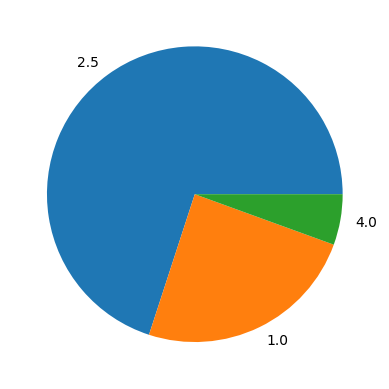

In [ ]:
plt.pie(data["Price Range"].value_counts(), labels=data["Price Range"].value_counts().index)

Resume:
  Most of restaurants have middle price range, that make sence. Also this feature has big part with null values(38%). Better to fill nulls with most common value. But also better to keep information about abscence of value in initial dataset with creating new feature


## Number of reviews

In [ ]:
data["Number of Reviews"].isna().sum(), data["Number of Reviews"].isna().sum() / data.shape[0]

(17344, 0.13816947748293196)

<Axes: xlabel='Number of Reviews', ylabel='Count'>

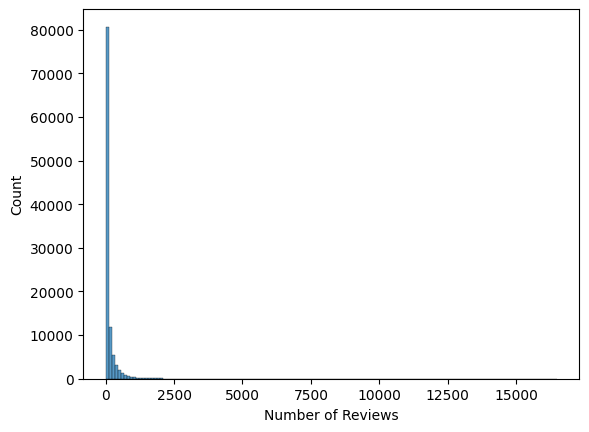

In [ ]:
sns.histplot(data=data, x="Number of Reviews", bins=150)

<Axes: xlabel='Number of Reviews', ylabel='Count'>

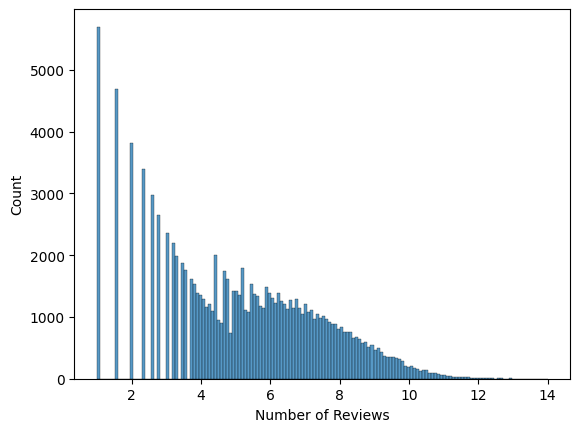

In [ ]:
sns.histplot(data=data["Number of Reviews"].apply(np.log2), bins=150)

In [ ]:
num_of_rev_IQR = data["Number of Reviews"].apply(np.log2).quantile(0.75) - data["Number of Reviews"].apply(np.log2).quantile(0.25)
data["Number of Reviews"].apply(np.log2).mean() - 1.5 * num_of_rev_IQR, data["Number of Reviews"].apply(np.log2).mean() + 1.5 * num_of_rev_IQR

(-0.42095587899412745, 10.56793915917316)

In [ ]:
np.exp2(10.56793915917316)

1517.9822008778401

<Axes: xlabel='Number of Reviews', ylabel='Count'>

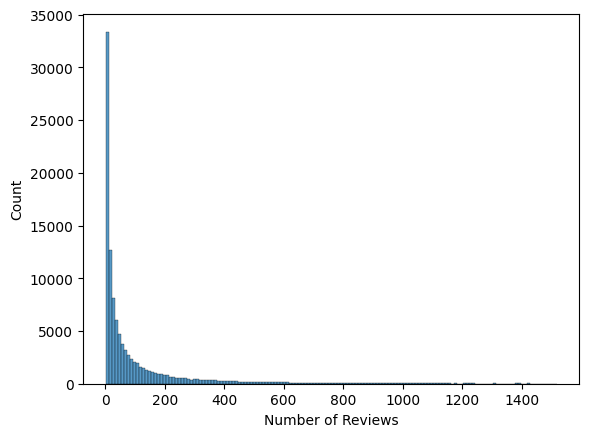

In [ ]:
sns.histplot(data=data[data["Number of Reviews"] <= 1517], x="Number of Reviews", bins=150)

<Axes: xlabel='Number of Reviews', ylabel='Count'>

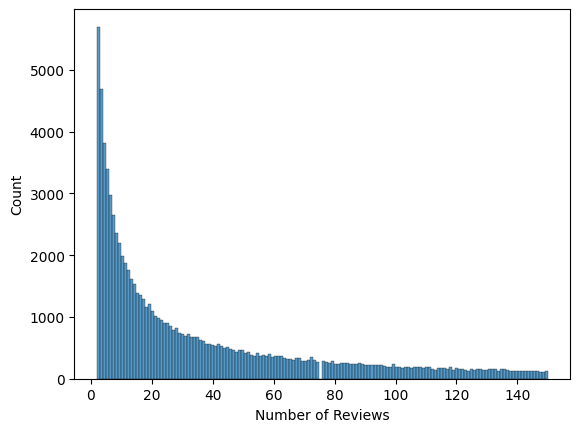

In [ ]:
sns.histplot(data=data[data["Number of Reviews"] <= 150], x="Number of Reviews", bins=150)

In [ ]:
data[data["Number of Reviews"] >= 1517]["Name"].count()

788

**Resume:**
  Seems like feature has kind of geometrical distribution. On prepare phase rather to logoriphm values. We define IQR and border of outliers(1518 reviews). In this dataset are 788 outliers, which could be deleted. But interest ing to analyse restoraunts with many of reviews. Also feature has 13% of nulls that could be replaced by mean value  

## Reviews

In [ ]:
data.loc[0:3, "Reviews"]

0    [['Just like home', 'A Warm Welcome to Wintry ...
1    [['Great food and staff', 'just perfect'], ['0...
2    [['Satisfaction', 'Delicious old school restau...
3    [['True five star dinner', 'A superb evening o...
Name: Reviews, dtype: object

In [ ]:
data.loc[0, "Reviews"]

"[['Just like home', 'A Warm Welcome to Wintry Amsterdam'], ['01/03/2018', '01/01/2018']]"

So value obtaines string with two reviews of this restaurant on the rtight site in [] and two dates of them on left so in the same breakets

In [ ]:
data["Reviews"].isna().sum(), data["Reviews"].isna().sum() / data.shape[0]

(9616, 0.07660503318011265)

In [ ]:
data[(data["Reviews"] == '[[], []]') |
     (data["Reviews"] == '[[''], ['']]') |
     (data["Reviews"] == '[['', ''], ['', '']]') |
     (data["Reviews"] == '[[ ], [ ]]') |
     (data["Reviews"] == '[[' ', ' '], [' ', ' ']]')]["Reviews"].count()

19094

In [ ]:
data[(data["Reviews"] == '[[], []]') |
     (data["Reviews"] == '[[''], ['']]') |
     (data["Reviews"] == '[['', ''], ['', '']]') |
     (data["Reviews"] == '[[ ], [ ]]') |
     (data["Reviews"] == '[[' ', ' '], [' ', ' ']]')]["Reviews"].count() / data.shape[0]

0.15211070128338924

In [ ]:
data[(data["Reviews"] == '[[], []]') |
     (data["Reviews"] == '[[''], ['']]') |
     (data["Reviews"] == '[['', ''], ['', '']]') |
     (data["Reviews"] == '[[ ], [ ]]') |
     (data["Reviews"] == '[[' ', ' '], [' ', ' ']]')]["Reviews"].sample(10)

73945     [[], []]
2743      [[], []]
79105     [[], []]
95812     [[], []]
80320     [[], []]
101888    [[], []]
72269     [[], []]
76005     [[], []]
98127     [[], []]
88086     [[], []]
Name: Reviews, dtype: object

In [ ]:
data[(data["Reviews"] == '[[], []]')]["Reviews"].count()

19094

In [ ]:
data["Reviews"] = data["Reviews"].fillna("[[], []]")

In [ ]:
data["dates_of_review"] = data["Reviews"].str.findall('\d+/\d+/\d+')

In [ ]:
data["number_of_reviews"] = data["dates_of_review"].apply(lambda x: len(x))

In [ ]:
data["number_of_reviews"].value_counts()

number_of_reviews
2    83472
0    28710
1    13340
3        5
Name: count, dtype: int64

There are 5 objects with 3 dates in it. We can delete them. But there are many objects(nearly 10%) with 1 date

In [ ]:
data[data["dates_of_review"].apply(lambda x: len(x)) == 1]["Reviews"].head()

457                 [['Airport bargain'], ['01/02/2018']]
1331                          [['Oasis'], ['10/18/2016']]
1359    [['A hidden gem for fish-lovers in central Am....
1736    [['A happy experience except for...'], ['08/19...
1749    [['Fresh ingredients and nice staff!'], ['10/2...
Name: Reviews, dtype: object

In [ ]:
def parse_dates(dates):
    """Преобразует список строковых дат в datetime, автоматически определяя формат."""
    return [parser.parse(date) for date in dates if pd.notna(date)]

def time_to_now(row):
    if row["number_of_reviews"] == 0 or not row["dates_of_review"]:
        return None
    dates = parse_dates(row["dates_of_review"])
    return datetime.now() - max(dates) if dates else None

def time_between_reviews(row):
    if row["number_of_reviews"] == 0 or not row["dates_of_review"]:
        return None
    dates = parse_dates(row["dates_of_review"])
    return max(dates) - min(dates) if len(dates) > 1 else None

In [ ]:
data["days_since_last_review"] = data.apply(time_to_now, axis=1).dt.days
data["days_between_reviews"] = data.apply(time_between_reviews, axis=1).dt.days


In [ ]:
data.head()

Unnamed: 0                        Name       City  \
0           0  Martine of Martine's Table  Amsterdam   
1           1         De Silveren Spiegel  Amsterdam   
2           2                     La Rive  Amsterdam   
3           3                    Vinkeles  Amsterdam   
4           4   Librije's Zusje Amsterdam  Amsterdam   

                                       Cuisine Style  Ranking  Rating  \
0                    ['French', 'Dutch', 'European']      1.0     5.0   
1  ['Dutch', 'European', 'Vegetarian Friendly', '...      2.0     4.5   
2  ['Mediterranean', 'French', 'International', '...      3.0     4.5   
3  ['French', 'European', 'International', 'Conte...      4.0     5.0   
4  ['Dutch', 'European', 'International', 'Vegeta...      5.0     4.5   

   Price Range  Number of Reviews  \
0          2.5              136.0   
1          4.0              812.0   
2          4.0              567.0   
3          4.0              564.0   
4          4.0              316.0   

                                             Reviews  \
0  [['Just like home', 'A Warm Welcome to Wintry ...   
1  [['Great food and staff', 'just perfect'], ['0...   
2  [['Satisfaction', 'Delicious old school restau...   
3  [['True five star dinner', 'A superb evening o...   
4  [['Best meal.... EVER', 'super food experience...   

                                              URL_TA      ID_TA  \
0  /Restaurant_Review-g188590-d11752080-Reviews-M...  d11752080   
1  /Restaurant_Review-g188590-d693419-Reviews-De_...    d693419   
2  /Restaurant_Review-g188590-d696959-Reviews-La_...    d696959   
3  /Restaurant_Review-g188590-d1239229-Reviews-Vi...   d1239229   
4  /Restaurant_Review-g188590-d6864170-Reviews-Li...   d6864170   

            dates_of_review  number_of_reviews  days_since_last_review  \
0  [01/03/2018, 01/01/2018]                  2                  2606.0   
1  [01/06/2018, 01/04/2018]                  2                  2603.0   
2  [01/04/2018, 01/04/2018]                  2                  2605.0   
3  [12/20/2017, 12/17/2017]                  2                  2620.0   
4  [01/06/2018, 01/04/2018]                  2                  2603.0   

   days_between_reviews  
0                   2.0  
1                   2.0  
2                   0.0  
3                   3.0  
4                   2.0

In [ ]:
data["days_since_last_review"].min()

2552.0

In [ ]:
data["days_since_last_review"] = data["days_since_last_review"]-data["days_since_last_review"].min()+1

In [ ]:
data[data["days_since_last_review"]==0]["days_since_last_review"].count()

0

<Axes: xlabel='days_since_last_review', ylabel='Count'>

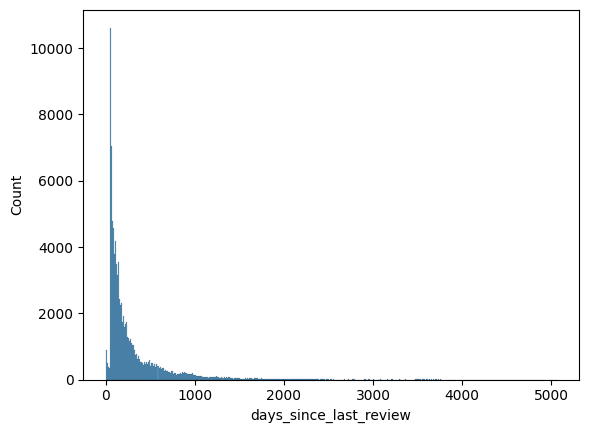

In [ ]:
sns.histplot(data["days_since_last_review"])

In [ ]:
days_since_IQR = data["days_since_last_review"].quantile(0.75) - data["days_since_last_review"].quantile(0.25)
data["days_since_last_review"].mean() - 1.5 * days_since_IQR, data["days_since_last_review"].mean() + 1.5 * days_since_IQR

(-99.76417364719003, 686.2358263528099)

In [ ]:
data[data["days_since_last_review"] >= 685]["days_since_last_review"].count()

10210

<Axes: xlabel='days_between_reviews', ylabel='Count'>

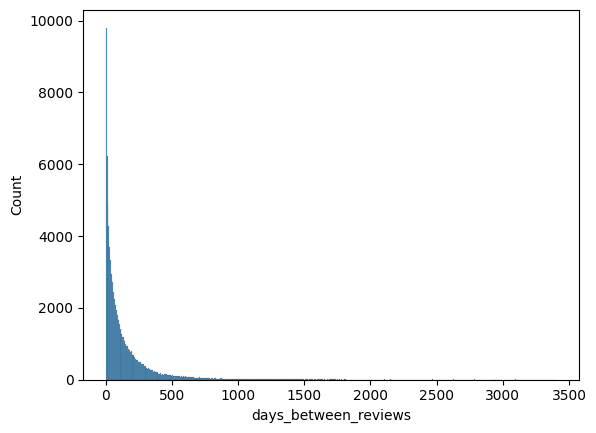

In [ ]:
sns.histplot(data["days_between_reviews"])

In [ ]:
days_between_IQR = data["days_between_reviews"].quantile(0.75) - data["days_between_reviews"].quantile(0.25)
days_between_IQR

153.0

In [ ]:
data["days_between_reviews"].mean() - 1.5*days_between_IQR, data["days_between_reviews"].mean() + 1.5*days_between_IQR

(-87.23169855169687, 371.76830144830313)

In [ ]:
data[data["days_between_reviews"] >= 372]["days_between_reviews"].count()

7598

**Resume:**
  Mostly this feature obtaining texts with couple of reviews can be analyzed by NLP, and in simple version of it could be used in this mostly baseline. By the way we created some few features based on simple parsing of values. They could be halpful in further analysis and used even in linear models. Days_between_reviews, days_since_last_review. These feature have kind of geometrical distribution, so better to handle it with logoriphm to avoid big influence of great values. There is warning, becouse features has in it 0 values.  Count_of_reviews - obtain information if it was nan or empty, if it has 1 review and so days_between_reviews could be easily filled.

## ID_TA and URL_TA

**Resume:**
These features could be used in further work with this dataset to parse websites of restaurants and gain more information. But for now we can remove these features

## Ranking

In [ ]:
data["Ranking"].isna().sum(), data["Ranking"].isna().sum() / data.shape[0]

(9651, 0.0768838576561218)

In [ ]:
data.head(20)

Unnamed: 0                                            Name       City  \
0            0                      Martine of Martine's Table  Amsterdam   
1            1                             De Silveren Spiegel  Amsterdam   
2            2                                         La Rive  Amsterdam   
3            3                                        Vinkeles  Amsterdam   
4            4                       Librije's Zusje Amsterdam  Amsterdam   
5            5                            Ciel Bleu Restaurant  Amsterdam   
6            6                                          Zaza's  Amsterdam   
7            7  Blue Pepper Restaurant And Candlelight Cruises  Amsterdam   
8            8                   Teppanyaki Restaurant Sazanka  Amsterdam   
9            9                         Rob Wigboldus Vishandel  Amsterdam   
10          10                                  The Happy Bull  Amsterdam   
11          11                                         Gartine  Amsterdam   
12          12                                 Restaurant Adam  Amsterdam   
13          13                                 Biercafe Gollem  Amsterdam   
14          14                              Restaurant Daalder  Amsterdam   
15          15                        Greenwoods Keizersgracht  Amsterdam   
16          16                           Omelegg - City Centre  Amsterdam   
17          17                             Brasserie Ambassade  Amsterdam   
18          18                               Sherpa Restaurant  Amsterdam   
19          19                         La Maschera Lillotatini  Amsterdam   

                                        Cuisine Style  Ranking  Rating  \
0                     ['French', 'Dutch', 'European']      1.0     5.0   
1   ['Dutch', 'European', 'Vegetarian Friendly', '...      2.0     4.5   
2   ['Mediterranean', 'French', 'International', '...      3.0     4.5   
3   ['French', 'European', 'International', 'Conte...      4.0     5.0   
4   ['Dutch', 'European', 'International', 'Vegeta...      5.0     4.5   
5   ['Contemporary', 'International', 'Vegetarian ...      6.0     4.5   
6   ['French', 'International', 'Mediterranean', '...      7.0     4.5   
7   ['Asian', 'Indonesian', 'Vegetarian Friendly',...      8.0     4.5   
8   ['Japanese', 'Asian', 'Vegetarian Friendly', '...      9.0     4.5   
9                   ['Dutch', 'Seafood', 'Fast Food']     10.0     4.5   
10  ['American', 'Bar', 'European', 'Vegetarian Fr...     11.0     4.5   
11  ['French', 'Dutch', 'International', 'European...     12.0     4.5   
12  ['French', 'European', 'Central European', 'Ve...     13.0     4.5   
13                                     ['Bar', 'Pub']     14.0     4.5   
14  ['French', 'Dutch', 'International', 'European...     15.0     4.5   
15  ['Dutch', 'Cafe', 'European', 'British', 'Vege...     16.0     4.5   
16  ['Dutch', 'European', 'Healthy', 'Internationa...     17.0     4.5   
17  ['French', 'Bar', 'International', 'European',...     18.0     4.5   
18  ['Indian', 'Tibetan', 'Nepali', 'Vegetarian Fr...     19.0     4.5   
19  ['Italian', 'Mediterranean', 'European', 'Vege...     20.0     4.5   

    Price Range  Number of Reviews  \
0           2.5              136.0   
1           4.0              812.0   
2           4.0              567.0   
3           4.0              564.0   
4           4.0              316.0   
5           4.0              745.0   
6           2.5             1455.0   
7           4.0              675.0   
8           4.0              923.0   
9           1.0              450.0   
10          2.5              295.0   
11          2.5              967.0   
12          4.0              368.0   
13          2.5              586.0   
14          4.0             1246.0   
15          2.5             1391.0   
16          1.0             1633.0   
17          4.0              958.0   
18          2.5              426.0   
19          2.5              421.0   

                                

Restaurants sorted by name of city and Ranking. Better to shuffle data before work of models.
And if we look at 3th and 4th strings we could notice, that place in ranking not based on rating, so restaurant with 4,5 rating could be higher in the list.

<Axes: xlabel='Ranking', ylabel='Count'>

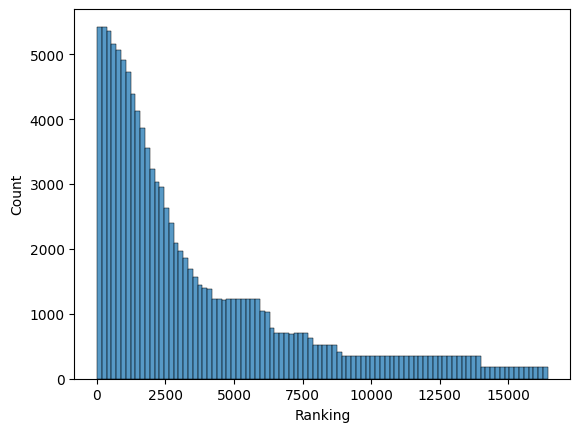

In [ ]:
sns.histplot(data["Ranking"])

<Axes: xlabel='Ranking', ylabel='Count'>

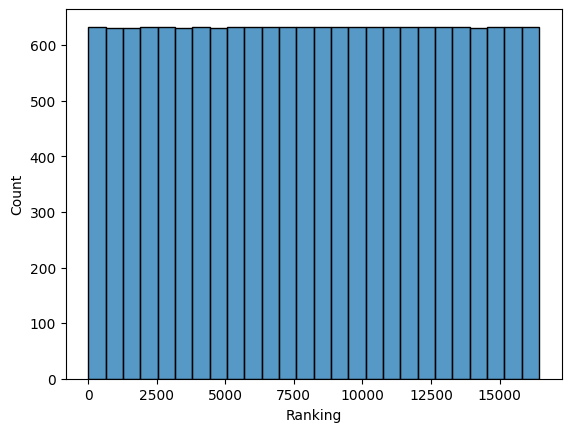

In [ ]:
sns.histplot(data[data["City"]=="London"]["Ranking"])

Obviosly in the exact city it is uniform distribution. Form of the common histogram caused differencies in amount of restaurants in the city.

**Resume:**
In this form in the dataset this feature could confuse model. Becouse last restaurant in small city will have same value as restaurant in the middle of ranking in big city. Solution is to standartize this feature according each city.

## 11. Rating (Target)

In [ ]:
data["Rating"].isna().sum()

9630

There are misses in the target. These objects will be removed.

In [ ]:
data["Rating"].unique()

array([ 5. ,  4.5,  4. ,  3.5,  3. ,  2.5,  2. ,  1.5,  1. , -1. ,  nan])

In [ ]:
data[data["Rating"] == -1]["Rating"].count()

41

In [ ]:
data[data["Rating"] == -1].head()

Unnamed: 0              Name       City  \
3239        3239     Reggae Rita's  Amsterdam   
3240        3240  Lokaal Spaanders  Amsterdam   
3241        3241    Bistro Berlage  Amsterdam   
3242        3242       Fondue oost  Amsterdam   
3247        3247        Pigs&Punch  Amsterdam   

                                          Cuisine Style  Ranking  Rating  \
3239                          ['Caribbean', 'Jamaican']      NaN    -1.0   
3240  ['French', 'European', 'Fusion', 'Street Food'...      NaN    -1.0   
3241                              ['Dutch', 'European']      NaN    -1.0   
3242  ['French', 'German', 'Belgian', 'Dutch', 'Euro...      NaN    -1.0   
3247                ['Bar', 'Barbecue', 'Grill', 'Pub']      NaN    -1.0   

      Price Range  Number of Reviews  \
3239          2.5                NaN   
3240          2.5                NaN   
3241          2.5                NaN   
3242          NaN                NaN   
3247          NaN                NaN   

                                                Reviews  \
3239  [['A TRUE BLESSING FOR YOUR STOMACH'], ['01/10...   
3240                                           [[], []]   
3241          [['Bistro is changing!'], ['01/09/2018']]   
3242  [['Might look good on socialMedia, sucks in r....   
3247                                           [[], []]   

                                                 URL_TA      ID_TA  \
3239  /Restaurant_Review-g188590-d12291891-Reviews-R...  d12291891   
3240  /Restaurant_Review-g188590-d12333583-Reviews-L...  d12333583   
3241  /Restaurant_Review-g188590-d13276050-Reviews-B...  d13276050   
3242  /Restaurant_Review-g188590-d13331300-Reviews-F...  d13331300   
3247  /Restaurant_Review-g188590-d13356735-Reviews-P...  d13356735   

     dates_of_review  number_of_reviews  days_since_last_review  \
3239    [01/10/2018]                  1                    48.0   
3240              []                  0                     NaN   
3241    [01/09/2018]                  1                    49.0   
3242    [01/10/2018]                  1                    48.0   
3247              []                  0                     NaN   

      days_between_reviews  
3239                   NaN  
3240                   NaN  
3241                   NaN  
3242                   NaN  
3247                   NaN

In [ ]:
data[(data["Rating"] == -1) & (data["Ranking"].notna())]["Rating"].count()

0

Objects with -1 in the target will be removed. Seems this value is for technicallpurposes, becouse every such objects has nan in Ranking

<Axes: xlabel='Rating', ylabel='count'>

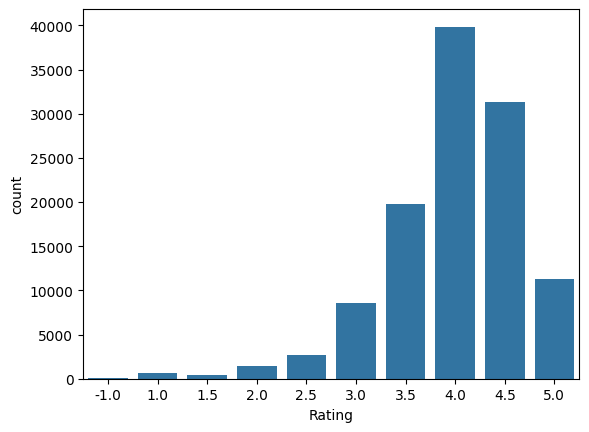

In [ ]:
sns.countplot(data=data, x="Rating")

In [ ]:
data["Rating"].mean(), data["Rating"].std()

(3.9874414350673444, 0.6788135754642898)

**Resume:**
Feature has 9630 null values and 40 with value -1, so they will be removed. Distribution has kind of normal for 10 values. Mean rating is 4

## Adding new features

In [ ]:
data.columns

Index(['Unnamed: 0', 'Name', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA',
       'dates_of_review', 'number_of_reviews', 'days_since_last_review',
       'days_between_reviews'],
      dtype='object')

In [ ]:
data["City"].unique()

array(['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Bratislava',
       'Brussels', 'Budapest', 'Copenhagen', 'Dublin', 'Edinburgh',
       'Geneva', 'Hamburg', 'Helsinki', 'Krakow', 'Lisbon', 'Ljubljana',
       'London', 'Luxembourg', 'Lyon', 'Madrid', 'Milan', 'Munich',
       'Oporto', 'Oslo', 'Paris', 'Prague', 'Rome', 'Stockholm', 'Vienna',
       'Warsaw', 'Zurich'], dtype=object)

In [ ]:
t = {'Amsterdam': 921, 'Athens': 653, 'Barcelona': 1602, 'Berlin': 3432, 'Bratislava': 475,
       'Brussels': 188 , 'Budapest': 1685, 'Copenhagen': 638, 'Dublin': 592, 'Edinburgh': 514,
       'Geneva': 203, 'Hamburg': 1946, 'Helsinki': 656, 'Krakow':790, 'Lisbon': 790, 'Ljubljana': 285 ,
       'London': 8866, 'Luxembourg': 668, 'Lyon': 522, 'Madrid': 3277, 'Milan': 3277, 'Munich': 1604,
       'Oporto': 231, 'Oslo': 709, 'Paris': 2103, 'Prague': 1335, 'Rome': 2760, 'Stockholm': 987, 'Vienna': 2015,
       'Warsaw': 1865, 'Zurich': 423 }
data["population_city"] = data["City"].apply(lambda x: t[x])

In [ ]:
t = {'Amsterdam': 1, 'Athens': 1, 'Barcelona': 0, 'Berlin': 1, 'Bratislava': 1,
       'Brussels': 1 , 'Budapest': 1, 'Copenhagen': 1, 'Dublin': 1, 'Edinburgh': 0,
       'Geneva': 0, 'Hamburg': 0, 'Helsinki': 1, 'Krakow':0, 'Lisbon': 1, 'Ljubljana': 1 ,
       'London': 1, 'Luxembourg': 1, 'Lyon': 0, 'Madrid': 1, 'Milan': 0, 'Munich': 0,
       'Oporto': 0, 'Oslo': 1, 'Paris': 1, 'Prague': 1, 'Rome': 1, 'Stockholm': 1, 'Vienna': 1,
       'Warsaw': 1, 'Zurich': 1 }
data["is_capital_city"] = data["City"].apply(lambda x: t[x])

In [ ]:
data.columns

Index(['Unnamed: 0', 'Name', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA',
       'dates_of_review', 'number_of_reviews', 'days_since_last_review',
       'days_between_reviews', 'population_city', 'is_capital_city'],
      dtype='object')

In [ ]:
data = pd.concat([data, pd.get_dummies(data["City"])], axis=1)
data.columns

Index(['Unnamed: 0', 'Name', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA',
       'dates_of_review', 'number_of_reviews', 'days_since_last_review',
       'days_between_reviews', 'population_city', 'is_capital_city',
       'Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Bratislava', 'Brussels',
       'Budapest', 'Copenhagen', 'Dublin', 'Edinburgh', 'Geneva', 'Hamburg',
       'Helsinki', 'Krakow', 'Lisbon', 'Ljubljana', 'London', 'Luxembourg',
       'Lyon', 'Madrid', 'Milan', 'Munich', 'Oporto', 'Oslo', 'Paris',
       'Prague', 'Rome', 'Stockholm', 'Vienna', 'Warsaw', 'Zurich'],
      dtype='object')

In [ ]:
data.shape

(125527, 48)

In [ ]:
data["Cuisine_Style_was_nan"] = data["Cuisine Style"].isna().astype(int)
data["Cuisine Style"] = data["Cuisine Style"].fillna("[]")

In [ ]:
cuisines_one_hot = pd.DataFrame(0, index=data.index, columns=cusines)

for cuisine_style in cusines:
  cuisines_one_hot[cuisine_style] = data["Cuisine Style"].apply(lambda x: cuisine_style in x).astype(int)

cuisines_one_hot

Vegetarian Friendly  European  Mediterranean  Italian  Vegan Options  \
0                         0         1              0        0              0   
1                         1         1              0        0              0   
2                         1         1              1        0              1   
3                         1         1              0        0              1   
4                         1         1              0        0              1   
...                     ...       ...            ...      ...            ...   
125522                    0         0              0        0              0   
125523                    0         0              0        0              0   
125524                    0         0              0        0              0   
125525                    0         0              0        0              0   
125526                    0         0              1        1              0   

        Gluten Free Options  Bar  French  Asian  Pizza  ...  Dutch  \
0                         0    0       1      0      0  ...      1   
1                         1    0       0      0      0  ...      1   
2                         0    0       1      0      0  ...      0   
3                         1    0       1      0      0  ...      0   
4                         1    0       0      0      0  ...      1   
...                     ...  ...     ...    ...    ...  ...    ...   
125522                    0    0       0      0      0  ...      0   
125523                    0    0       0      0      0  ...      0   
125524                    0    0       0      0      0  ...      0   
125525                    0    0       0      0      0  ...      0   
125526                    0    0       0      0      1  ...      0   

        Street Food  Belgian  Irish  Swiss  Swedish  Danish  African  \
0                 0        0      0      0        0       0        0   
1                 0        0      0      0        0       0        0   
2                 0        0      0      0        0       0        0   
3                 0        0      0      0        0       0        0   
4                 0        0      0      0        0       0        0   
...             ...      ...    ...    ...      ...     ...      ...   
125522            0        0      0      0        0       0        0   
125523            0        0      0      0        0       0        0   
125524            0        0      0      0        0       0        0   
125525            0        0      0      0        0       0        0   
125526            0        0      0      0        0       0        0   

        Slovenian  Kosher  
0               0       0  
1               0       0  
2               0       0  
3               0       0  
4               0       0  
...           ...     ...  
125522          0       0  
125523          0       0  
125524          0       0  
125525          0       0  
125526          0       0  

[125527 rows x 54 columns]

In [ ]:
data.shape

(125527, 49)

In [ ]:
data = pd.concat([data, cuisines_one_hot], axis=1)
data.head()

Unnamed: 0                        Name       City  \
0           0  Martine of Martine's Table  Amsterdam   
1           1         De Silveren Spiegel  Amsterdam   
2           2                     La Rive  Amsterdam   
3           3                    Vinkeles  Amsterdam   
4           4   Librije's Zusje Amsterdam  Amsterdam   

                                       Cuisine Style  Ranking  Rating  \
0                    ['French', 'Dutch', 'European']      1.0     5.0   
1  ['Dutch', 'European', 'Vegetarian Friendly', '...      2.0     4.5   
2  ['Mediterranean', 'French', 'International', '...      3.0     4.5   
3  ['French', 'European', 'International', 'Conte...      4.0     5.0   
4  ['Dutch', 'European', 'International', 'Vegeta...      5.0     4.5   

   Price Range  Number of Reviews  \
0          2.5              136.0   
1          4.0              812.0   
2          4.0              567.0   
3          4.0              564.0   
4          4.0              316.0   

                                             Reviews  \
0  [['Just like home', 'A Warm Welcome to Wintry ...   
1  [['Great food and staff', 'just perfect'], ['0...   
2  [['Satisfaction', 'Delicious old school restau...   
3  [['True five star dinner', 'A superb evening o...   
4  [['Best meal.... EVER', 'super food experience...   

                                              URL_TA  ... Dutch Street Food  \
0  /Restaurant_Review-g188590-d11752080-Reviews-M...  ...     1           0   
1  /Restaurant_Review-g188590-d693419-Reviews-De_...  ...     1           0   
2  /Restaurant_Review-g188590-d696959-Reviews-La_...  ...     0           0   
3  /Restaurant_Review-g188590-d1239229-Reviews-Vi...  ...     0           0   
4  /Restaurant_Review-g188590-d6864170-Reviews-Li...  ...     1           0   

   Belgian  Irish  Swiss  Swedish  Danish  African  Slovenian  Kosher  
0        0      0      0        0       0        0          0       0  
1        0      0      0        0       0        0          0       0  
2        0      0      0        0       0        0          0       0  
3        0      0      0        0       0        0          0       0  
4        0      0      0        0       0        0          0       0  

[5 rows x 103 columns]

In [ ]:
data.shape

(125527, 103)

In [ ]:
data["price_ranking_was_nan"] = data["Price Range"].isna().astype(int)
data["Price Range"] = data["Price Range"].fillna(2.5)

In [ ]:
data.shape

(125527, 104)

In [ ]:
data["log_number_of_reviews"] = data["Number of Reviews"].apply(np.log2)

In [ ]:
data.shape

(125527, 105)

In [ ]:
data["log_days_since_last_review"] = data["days_since_last_review"].apply(lambda x: np.log2(x+1))
data["log_days_between_reviews"] = data["days_between_reviews"].apply(lambda x: np.log2(x+1))

In [ ]:
list(data.columns)

['Unnamed: 0',
 'Name',
 'City',
 'Cuisine Style',
 'Ranking',
 'Rating',
 'Price Range',
 'Number of Reviews',
 'Reviews',
 'URL_TA',
 'ID_TA',
 'dates_of_review',
 'number_of_reviews',
 'days_since_last_review',
 'days_between_reviews',
 'population_city',
 'is_capital_city',
 'Amsterdam',
 'Athens',
 'Barcelona',
 'Berlin',
 'Bratislava',
 'Brussels',
 'Budapest',
 'Copenhagen',
 'Dublin',
 'Edinburgh',
 'Geneva',
 'Hamburg',
 'Helsinki',
 'Krakow',
 'Lisbon',
 'Ljubljana',
 'London',
 'Luxembourg',
 'Lyon',
 'Madrid',
 'Milan',
 'Munich',
 'Oporto',
 'Oslo',
 'Paris',
 'Prague',
 'Rome',
 'Stockholm',
 'Vienna',
 'Warsaw',
 'Zurich',
 'Cuisine_Style_was_nan',
 'Vegetarian Friendly',
 'European',
 'Mediterranean',
 'Italian',
 'Vegan Options',
 'Gluten Free Options',
 'Bar',
 'French',
 'Asian',
 'Pizza',
 'Spanish',
 'Pub',
 'Cafe',
 'Fast Food',
 'British',
 'International',
 'Japanese',
 'Seafood',
 'Central European',
 'American',
 'Chinese',
 'Sushi',
 'Portuguese',
 'Indian',


In [ ]:
t = data.groupby(by="City")["Ranking"].max().reset_index()
data = data.merge(t, on="City", how="left")
data.head()

Unnamed: 0                        Name       City  \
0           0  Martine of Martine's Table  Amsterdam   
1           1         De Silveren Spiegel  Amsterdam   
2           2                     La Rive  Amsterdam   
3           3                    Vinkeles  Amsterdam   
4           4   Librije's Zusje Amsterdam  Amsterdam   

                                       Cuisine Style  Ranking_x  Rating  \
0                    ['French', 'Dutch', 'European']        1.0     5.0   
1  ['Dutch', 'European', 'Vegetarian Friendly', '...        2.0     4.5   
2  ['Mediterranean', 'French', 'International', '...        3.0     4.5   
3  ['French', 'European', 'International', 'Conte...        4.0     5.0   
4  ['Dutch', 'European', 'International', 'Vegeta...        5.0     4.5   

   Price Range  Number of Reviews  \
0          2.5              136.0   
1          4.0              812.0   
2          4.0              567.0   
3          4.0              564.0   
4          4.0              316.0   

                                             Reviews  \
0  [['Just like home', 'A Warm Welcome to Wintry ...   
1  [['Great food and staff', 'just perfect'], ['0...   
2  [['Satisfaction', 'Delicious old school restau...   
3  [['True five star dinner', 'A superb evening o...   
4  [['Best meal.... EVER', 'super food experience...   

                                              URL_TA  ... Swedish Danish  \
0  /Restaurant_Review-g188590-d11752080-Reviews-M...  ...       0      0   
1  /Restaurant_Review-g188590-d693419-Reviews-De_...  ...       0      0   
2  /Restaurant_Review-g188590-d696959-Reviews-La_...  ...       0      0   
3  /Restaurant_Review-g188590-d1239229-Reviews-Vi...  ...       0      0   
4  /Restaurant_Review-g188590-d6864170-Reviews-Li...  ...       0      0   

   African  Slovenian  Kosher  price_ranking_was_nan  log_number_of_reviews  \
0        0          0       0                      0               7.087463   
1        0          0       0                      0               9.665336   
2        0          0       0                      0               9.147205   
3        0          0       0                      0               9.139551   
4        0          0       0                      0               8.303781   

   log_days_since_last_review  log_days_between_reviews  Ranking_y  
0                    5.807355                  1.584963     3254.0  
1                    5.727920                  1.584963     3254.0  
2                    5.781360                  0.000000     3254.0  
3                    6.129283                  2.000000     3254.0  
4                    5.727920                  1.584963     3254.0  

[5 rows x 108 columns]

In [ ]:
local_cuisine_dict = {'Amsterdam': 'Dutch', 'Athens': 'Greek', 'Barcelona':'Spanish', 'Berlin': 'German', 'Bratislava': 'Eastern European',
       'Brussels': 'Belgian', 'Copenhagen': 'Danish', 'Dublin': 'Irish', 'Edinburgh': 'British', 'Budapest': 'Eastern European',
       'Geneva': 'Swiss', 'Hamburg': 'German', 'Helsinki': 'Scandinavian', 'Krakow': 'Polish', 'Lisbon': 'Portuguese', 'Ljubljana': 'Slovenian',
       'London': 'British', 'Luxembourg': 'German', 'Lyon': 'French', 'Madrid': 'Spanish', 'Milan': 'Italian', 'Munich': 'German',
       'Oporto': 'Portuguese', 'Oslo': 'Scandinavian', 'Paris': 'French', 'Prague': 'Czech', 'Rome': 'Italian', 'Stockholm': 'Swedish', 'Vienna': 'Austrian',
       'Warsaw': 'Polish', 'Zurich': 'Swiss'}

data["is_local_cuisine"] = data.apply(lambda x: 1 if x[local_cuisine_dict[x["City"]]] == 1 else 0, axis=1)

In [ ]:
data = data.rename(columns={"Ranking_x": "Ranking", "Ranking_y": "max_ranking_in_city"})

In [ ]:
data["Relative_ranking"] = 1 - data["Ranking"] / data["max_ranking_in_city"]
data.head()

Unnamed: 0                        Name       City  \
0           0  Martine of Martine's Table  Amsterdam   
1           1         De Silveren Spiegel  Amsterdam   
2           2                     La Rive  Amsterdam   
3           3                    Vinkeles  Amsterdam   
4           4   Librije's Zusje Amsterdam  Amsterdam   

                                       Cuisine Style  Ranking  Rating  \
0                    ['French', 'Dutch', 'European']      1.0     5.0   
1  ['Dutch', 'European', 'Vegetarian Friendly', '...      2.0     4.5   
2  ['Mediterranean', 'French', 'International', '...      3.0     4.5   
3  ['French', 'European', 'International', 'Conte...      4.0     5.0   
4  ['Dutch', 'European', 'International', 'Vegeta...      5.0     4.5   

   Price Range  Number of Reviews  \
0          2.5              136.0   
1          4.0              812.0   
2          4.0              567.0   
3          4.0              564.0   
4          4.0              316.0   

                                             Reviews  \
0  [['Just like home', 'A Warm Welcome to Wintry ...   
1  [['Great food and staff', 'just perfect'], ['0...   
2  [['Satisfaction', 'Delicious old school restau...   
3  [['True five star dinner', 'A superb evening o...   
4  [['Best meal.... EVER', 'super food experience...   

                                              URL_TA  ... African Slovenian  \
0  /Restaurant_Review-g188590-d11752080-Reviews-M...  ...       0         0   
1  /Restaurant_Review-g188590-d693419-Reviews-De_...  ...       0         0   
2  /Restaurant_Review-g188590-d696959-Reviews-La_...  ...       0         0   
3  /Restaurant_Review-g188590-d1239229-Reviews-Vi...  ...       0         0   
4  /Restaurant_Review-g188590-d6864170-Reviews-Li...  ...       0         0   

   Kosher  price_ranking_was_nan  log_number_of_reviews  \
0       0                      0               7.087463   
1       0                      0               9.665336   
2       0                      0               9.147205   
3       0                      0               9.139551   
4       0                      0               8.303781   

   log_days_since_last_review  log_days_between_reviews  max_ranking_in_city  \
0                    5.807355                  1.584963               3254.0   
1                    5.727920                  1.584963               3254.0   
2                    5.781360                  0.000000               3254.0   
3                    6.129283                  2.000000               3254.0   
4                    5.727920                  1.584963               3254.0   

   is_local_cuisine  Relative_ranking  
0                 1          0.999693  
1                 1          0.999385  
2                 0          0.999078  
3                 0          0.998771  
4                 1          0.998463  

[5 rows x 110 columns]

In [ ]:
data.shape

(125527, 110)

## Interaction of features

<Axes: title={'center': 'Mean price range in the city'}, xlabel='Price Range', ylabel='City'>

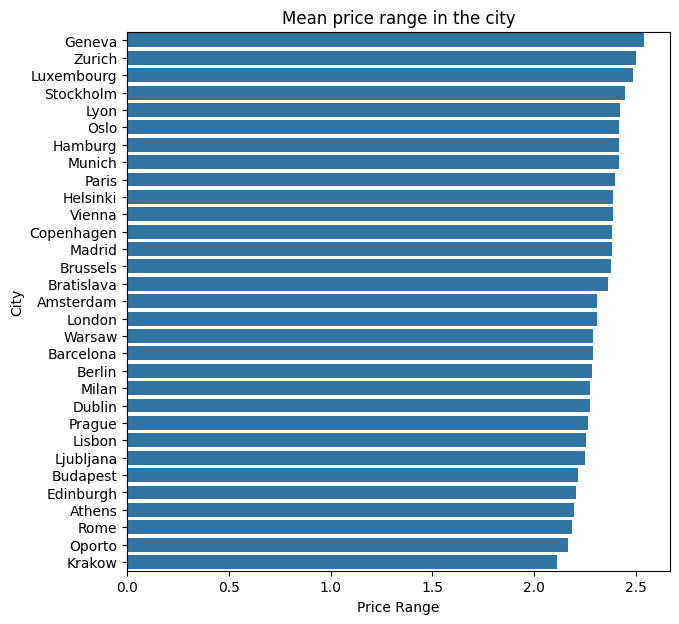

In [ ]:
plt.figure(figsize=(7, 7))
plt.title("Mean price range in the city")
sns.barplot(data=data.groupby(by="City")["Price Range"].mean().reset_index(), y="City", x="Price Range",  order=data.groupby(by="City")["Price Range"].mean().sort_values(ascending=False).index)

Most expensive cities are in Switzerland, Luxemburg and Scandinavia. So cities from north and west europe are more expensive, then cities of eastern and southern europe are least expensive, so it is intuitive predictable. Surprisingly expensive are restaurants in Lyon, and surprisingly cheap are Rome, Edinburgh. Below are pie charts about each city.

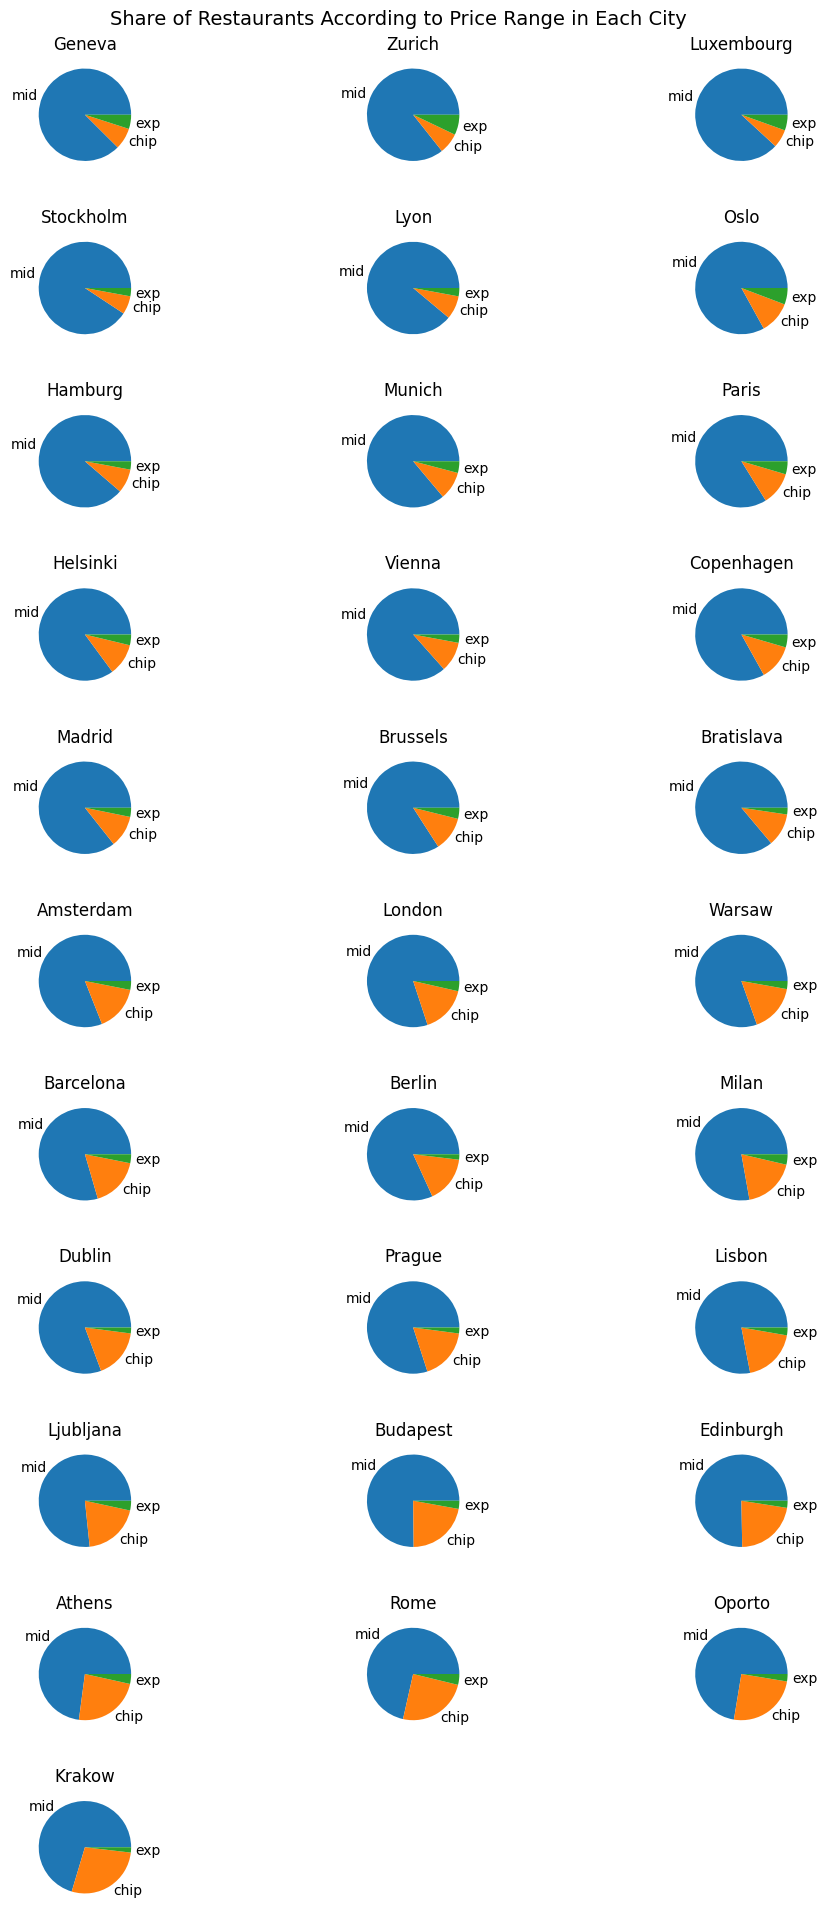

In [ ]:
cities = list(data.groupby(by="City")["Price Range"].mean().reset_index().sort_values(by="Price Range", ascending=False)["City"])
labels = ["mid", "chip", "exp"]
fig, axs = plt.subplots(11, 3, figsize=(12, 24))
fig.suptitle("Share of Restaurants According to Price Range in Each City", fontsize=14, y=0.9)
plt.subplots_adjust(hspace=0.5)
plt.title("Share of restaurants according Price range in the city")
for i, city in enumerate(cities):
  axs[i//3, i%3].pie(x=data[data["City"]==city]["Price Range"].value_counts(), labels=labels)
  axs[i//3, i%3].set_title(city)
fig.delaxes(axs[10, 1])
fig.delaxes(axs[10, 2])
plt.show()

Text(0.5, 1.0, 'Mean rating according price range')

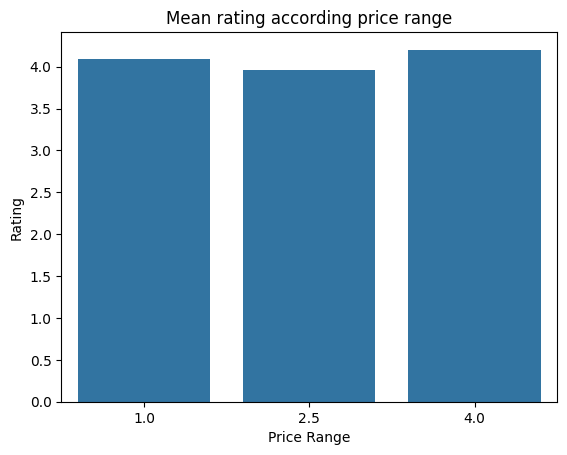

In [ ]:
sns.barplot(data=data.groupby(by="Price Range")["Rating"].mean().reset_index(), x="Price Range", y="Rating")
plt.title("Mean rating according price range")

Text(0.5, 1.0, 'Mean price range according rating')

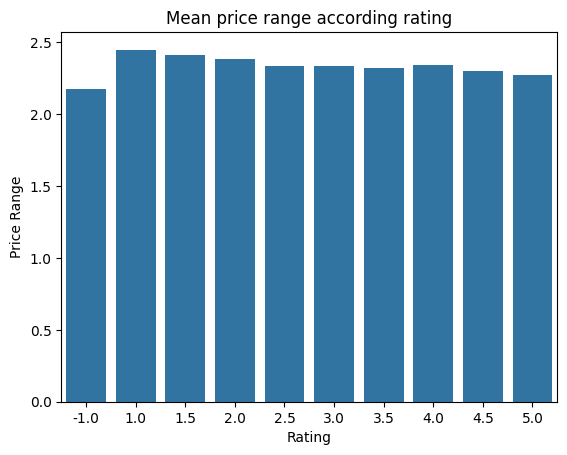

In [ ]:
sns.barplot(data=data.groupby(by="Rating")["Price Range"].mean().reset_index(), x="Rating", y="Price Range")
plt.title("Mean price range according rating")

Hard to say about existance of dependencies between rating and price range by thear mean values

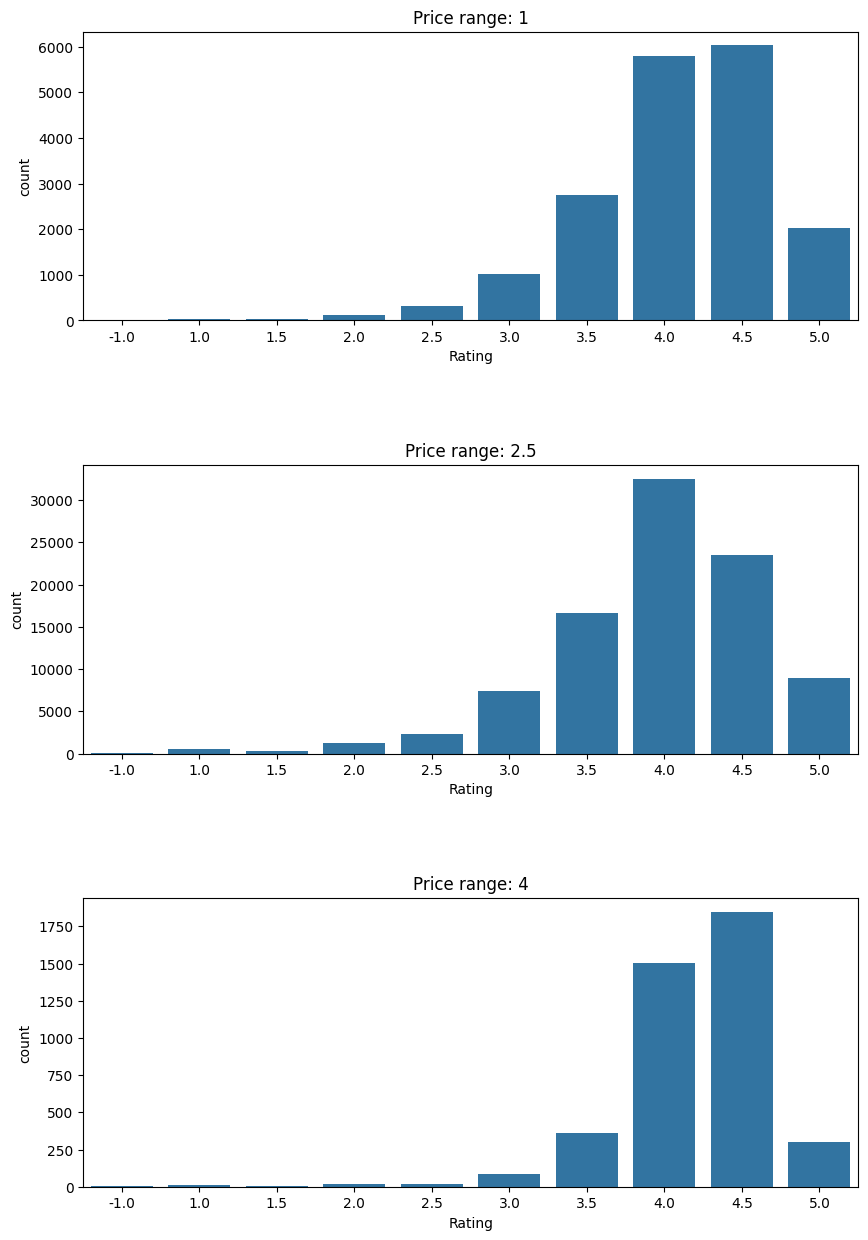

In [ ]:
#plt.title("Rating historams in price reanges")
fig, axs = plt.subplots(3, figsize=(10, 15))
plt.subplots_adjust(hspace=0.5)
for i, range in enumerate([1, 2.5, 4]):
  sns.countplot(data=data[data["Price Range"] == range], x="Rating", ax=axs[i])
  axs[i].set_title(f"Price range: {range}")
plt.show()

So, expensive restaurants more likely will recieve 4.0 or 4.5, while middle and cheap restaurants recieve more 3.5, 3.0 and 5.0. Though mean rating are relativly close

<Axes: title={'center': 'Mean rating of the bin off relative ranking in the city'}, xlabel='Relative_ranking', ylabel='Rating'>

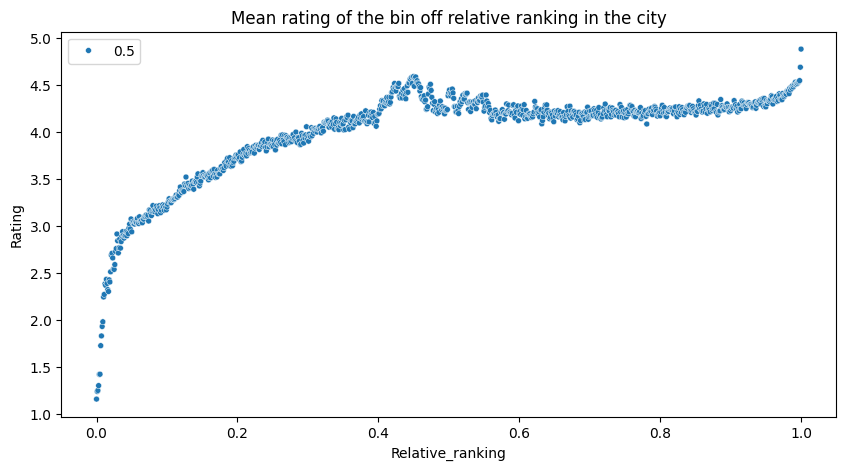

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Mean rating of the bin off relative ranking in the city")
sns.scatterplot(data=data.groupby(data["Relative_ranking"].round(3))["Rating"].mean().reset_index(), x="Relative_ranking", y="Rating", size=0.5)

So restaurants in the end of list has very low rating, then it increases. After 0.5 mean rating is on the same level(4,1). Mean rating of Restaurants with the highest position in ranking(after 0.975) is approaching 5.

Can see strange thing in the middle(0.4 - 0.5), where mean rating is bigger then neighboors areas. Even restaurants positioned higher in the list have lesser mean rating. We need to look closer.

<Axes: title={'center': 'Mean rating of the bin off relative ranking in the city in the strange area'}, xlabel='Relative_ranking', ylabel='Rating'>

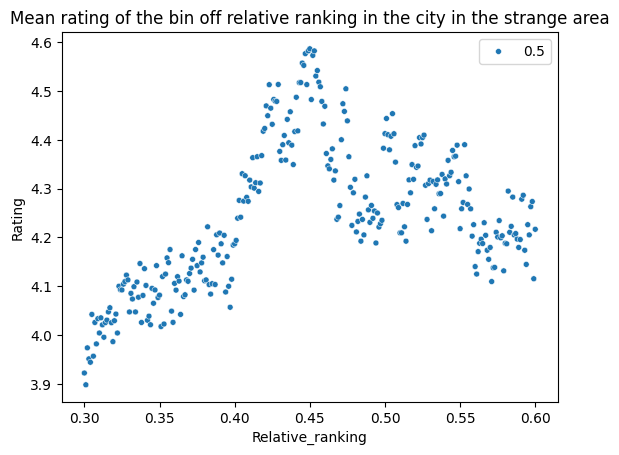

In [ ]:
 plt.title("Mean rating of the bin off relative ranking in the city in the strange area")
 sns.scatterplot(data=data[(data["Relative_ranking"] >= 0.3) & (data["Relative_ranking"] <= 0.6)].groupby(data["Relative_ranking"].round(3))["Rating"].mean().reset_index(), x="Relative_ranking", y="Rating", size=0.5)

<Axes: title={'center': 'Mean rating of the bin off relative ranking in the city with other scale'}, xlabel='Relative_ranking', ylabel='Rating'>

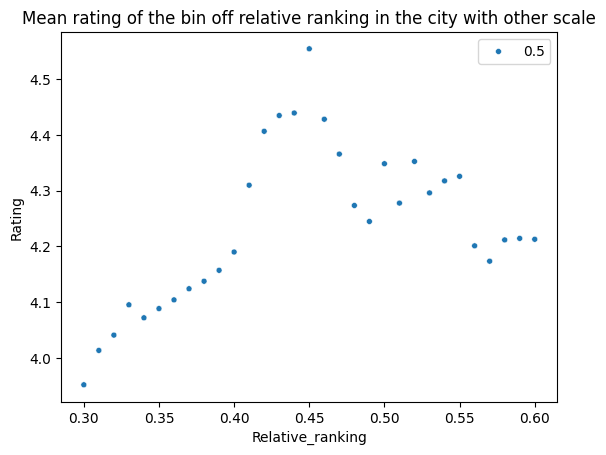

In [ ]:
plt.title("Mean rating of the bin off relative ranking in the city with other scale")
sns.scatterplot(data=data[(data["Relative_ranking"] >= 0.3) & (data["Relative_ranking"] <= 0.6)].groupby(data["Relative_ranking"].round(2))["Rating"].mean().reset_index(), x="Relative_ranking", y="Rating", size=0.5)

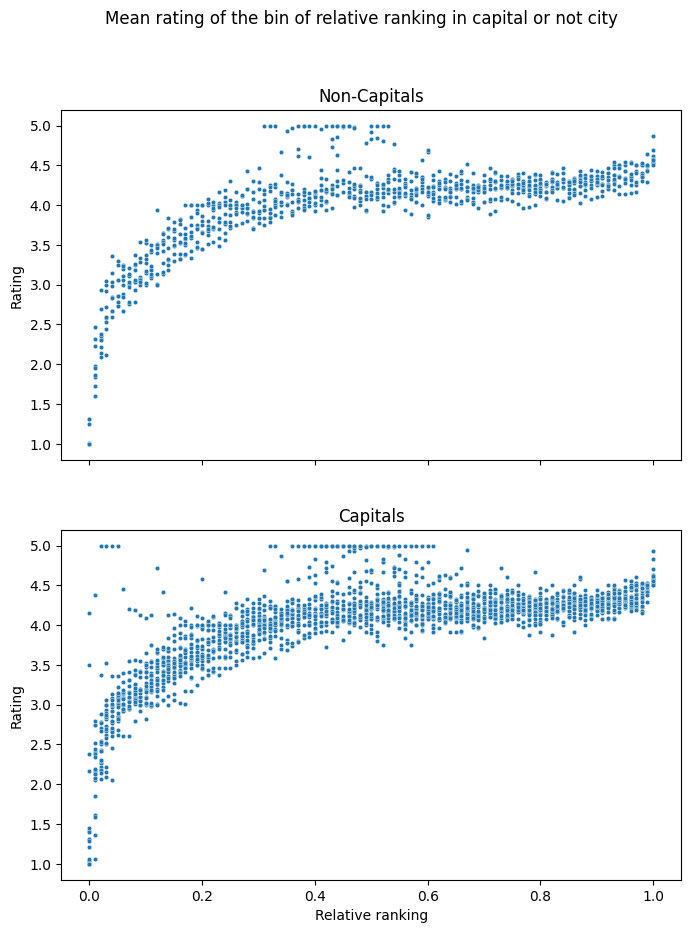

In [ ]:
t = data.groupby(by=["is_capital_city", "City", data["Relative_ranking"].round(2)])["Rating"].mean().reset_index()
fig, axes = plt.subplots(nrows=2, figsize=(8, 10), sharex=True)
fig.suptitle("Mean rating of the bin of relative ranking in capital or not city")
plt.subplots_adjust(hspace=0.2)
for i, is_capital in enumerate([0, 1]):
  ax = axes[i]
  sns.scatterplot(data=t[t["is_capital_city"] == is_capital],
                  x="Relative_ranking",
                  y="Rating",
                  s=10,
                  ax=ax
  )

  ax.set_title("Capitals" if is_capital else "Non-Capitals")
  ax.set_ylabel("Rating")

axes[-1].set_xlabel("Relative ranking")
plt.show()

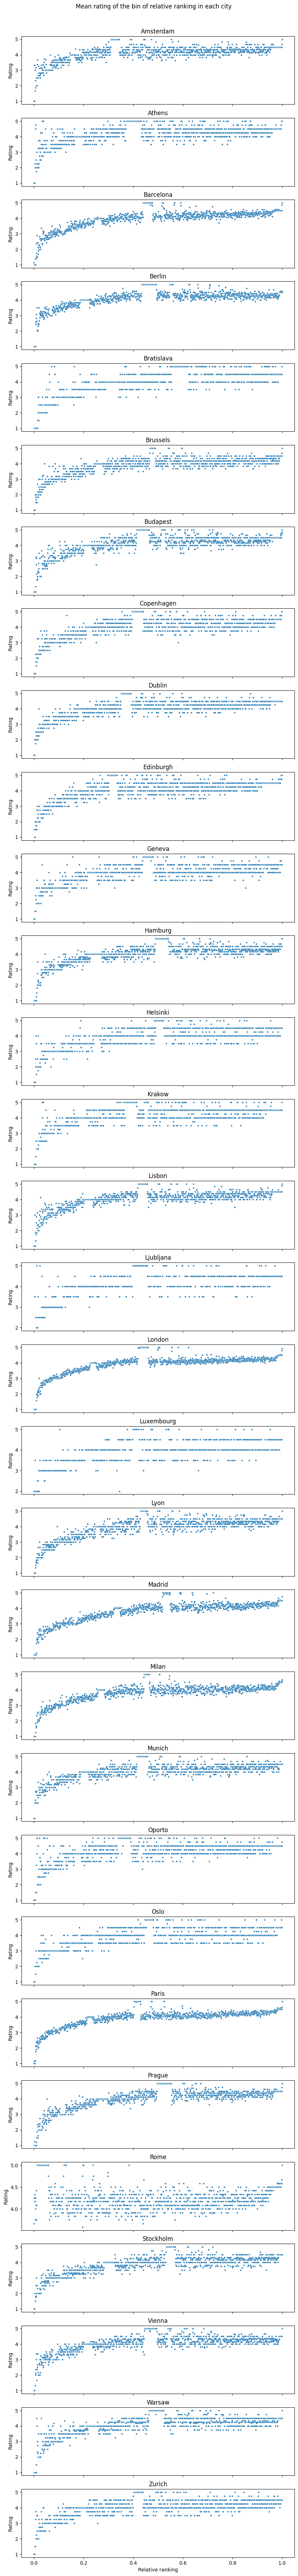

In [ ]:
t = data.groupby(by=["City", data["Relative_ranking"].round(3)])["Rating"].mean().reset_index()
fig, axes = plt.subplots(nrows=31, figsize=(10, 31*3), sharex=True)
fig.suptitle("Mean rating of the bin of relative ranking in each city", y=0.89)
plt.subplots_adjust(hspace=0.2)
for i, city in enumerate(t["City"].unique()):
  ax = axes[i]
  sns.scatterplot(data=t[t["City"] == city],
                  x="Relative_ranking",
                  y="Rating",
                  s=10,
                  ax=ax
  )

  ax.set_title(city)
  ax.set_ylabel("Rating")

axes[-1].set_xlabel("Relative ranking")
plt.show()

Plots let us to see that in some points(different in different cities) near 0.4-0.5 where mean rating is exactly 5.0. Lets see on example of Prague

In [ ]:
data[(data["City"]=="Prague") & (data["Relative_ranking"] >= 0.50) & (data["Relative_ranking"] <= 0.51)]["Rating"].mean()

5.0

In [ ]:
data[(data["City"]=="Prague") & (data["Relative_ranking"] >= 0.50) & (data["Relative_ranking"] <= 0.51)].sort_values(by="Rating", ascending=False)[["Name", "Rating", "Ranking", "Relative_ranking", "Price Range", "Number of Reviews"]]

Name  Rating  Ranking  Relative_ranking  \
106323                      Sesterna Bar     5.0   2055.0          0.509781   
106354                    Dobra Cukrarna     5.0   2086.0          0.502385   
106346                         Stockholm     5.0   2078.0          0.504294   
106347     Kavarna Na Senovaznem Namesti     5.0   2079.0          0.504055   
106348         Bistro On Rumunska Street     5.0   2080.0          0.503817   
106349                    U Modre Hvezdy     5.0   2081.0          0.503578   
106350                     Gattino-Pizza     5.0   2082.0          0.503340   
106351       Creperie On Plzenska Street     5.0   2083.0          0.503101   
106352                           S'Chuan     5.0   2084.0          0.502863   
106353                         Gao Sheng     5.0   2085.0          0.502624   
106355                 U Staryho Kocarka     5.0   2087.0          0.502147   
106324                    U Ceske Koruny     5.0   2056.0          0.509542   
106356                           Paneria     5.0   2088.0          0.501908   
106357               Bageterie Boulevard     5.0   2089.0          0.501670   
106358                       Delicatesse     5.0   2090.0          0.501431   
106359                          Domovina     5.0   2091.0          0.501193   
106360                        Hua Mei Ge     5.0   2092.0          0.500954   
106361                          Belcredi     5.0   2093.0          0.500716   
106362                            Dortik     5.0   2094.0          0.500477   
106363                        Chocobamba     5.0   2095.0          0.500239   
106345                               Sen     5.0   2077.0          0.504532   
106344                Hostinec Slavikova     5.0   2076.0          0.504771   
106343                    Helena Fejkova     5.0   2075.0          0.505010   
106342  Skolni Jidelna On Trojska Street     5.0   2074.0          0.505248   
106325         PureThai - Nae's Takeaway     5.0   2057.0          0.509303   
106326                            Sanjay     5.0   2058.0          0.509065   
106327         Vietnamska restaurace MOC     5.0   2059.0          0.508826   
106328               Geekarna - Cafe Bar     5.0   2060.0          0.508588   
106329                   Vinoteka Naskok     5.0   2061.0          0.508349   
106330                  Mondieu - Chodov     5.0   2062.0          0.508111   
106331                         U Venouse     5.0   2063.0          0.507872   
106332                         Excalibur     5.0   2064.0          0.507634   
106333                           Na Fare     5.0   2065.0          0.507395   
106334                        U Karla IV     5.0   2066.0          0.507156   
106335                         U Popelky     5.0   2067.0          0.506918   
106336                           V Aleji     5.0   2068.0          0.506679   
106337                           Paneria     5.0   2069.0          0.506441   
106338                           Tai Wan     5.0   2070.0          0.506202   
106339                      Quick Apetit     5.0   2071.0          0.505964   
106340                            Terasy     5.0   2072.0          0.505725   
106341         Cukrarna Na Ul. Terronska     5.0   2073.0          0.505487   
106364                           Jin Xin     5.0   2096.0          0.500000   

        Price Range  Number of Reviews  
106323          2.5                NaN  
106354          2.5                NaN  
106346          2.5                2.0  
106347          2.5                NaN  
106348          2.5                NaN  
106349          2.5                NaN  
106350          2.5                NaN  
106351          2.5                2.0  
106352          2.5                NaN  
106353          2.5                NaN  
106355          2.5                2.0  
106324          2.5                NaN  
106356          2.5                NaN  
106357          2.5                2.0  
106358          2.5    

In the 51th percentile restaurants has little amount of reviews(or has no value). For comparison 71th percintile

In [ ]:
data[(data["City"]=="Prague") & (data["Relative_ranking"] >= 0.70) & (data["Relative_ranking"] <= 0.71)]["Rating"].mean()

4.285714285714286

In [ ]:
data[(data["City"]=="Prague") & (data["Relative_ranking"] >= 0.70) & (data["Relative_ranking"] <= 0.71)].sort_values(by="Rating", ascending=False)[["Name", "Rating", "Ranking", "Relative_ranking", "Price Range", "Number of Reviews"]]

Name  Rating  Ranking  \
105520                             Prazska kavarna     5.0   1250.0   
105519                                Tea Mountain     5.0   1249.0   
105518                              Cafe TERRONSKA     5.0   1248.0   
105517                                   La Paluba     5.0   1247.0   
105516                       Skotsky Klub Sedy Pes     5.0   1246.0   
105497            Le Sommelier Wine Bar Restaurant     5.0   1227.0   
105507                               Bubble Lounge     4.5   1237.0   
105506                       Caffe Pizzeria Vinice     4.5   1236.0   
105525                              Butch's Burger     4.5   1255.0   
105524                            Kostovna U Poctu     4.5   1254.0   
105523                        Restaurace U Vodarny     4.5   1253.0   
105522                                  Pelmenarna     4.5   1252.0   
105509                         Krkonosska hospudka     4.5   1239.0   
105487                        Antoninovo Pekarstvi     4.5   1217.0   
105527                         Restaurant Amboseli     4.5   1257.0   
105488                                      Arieta     4.5   1218.0   
105490                         Pizzeria Vendemaria     4.5   1220.0   
105491                              Donuter Donuts     4.5   1221.0   
105492             Aioha Restaurant & Cocktaii Bar     4.5   1222.0   
105498                        Minipivovar Beznoska     4.5   1228.0   
105493                                    Skolicka     4.5   1223.0   
105495                                Cafe AdAstra     4.5   1225.0   
105496                              Manni Kebabish     4.5   1226.0   
105501                                 Na Paloucku     4.0   1231.0   
105515                        Concordia Ristorante     4.0   1245.0   
105526                              Pizzeria Carlo     4.0   1256.0   
105489                     Moon Chinese Restaurant     4.0   1219.0   
105494                            Park7 Restaurant     4.0   1224.0   
105514                             KFC I.P.Pavlova     4.0   1244.0   
105513                   Krusovicka Salanda Karlin     4.0   1243.0   
105511                                    Cafe NoD     4.0   1241.0   
105510                                 Cafe Kampus     4.0   1240.0   
105508  Halal restaurant Caspian by Mangal, Prague     4.0   1238.0   
105499                         Restaurant Lvi Dvur     4.0   1229.0   
105500                                      U Sani     4.0   1230.0   
105505                                  U Templare     4.0   1235.0   
105486                                     Yam Yam     4.0   1216.0   
105502                                     Hooters     3.5   1232.0   
105512                    Restaurant Cervena Sedma     3.5   1242.0   
105521                            Rozmbersky Palac     3.5   1251.0   
105504                                   Mama Lucy     3.5   1234.0   
105503              Hotel U Tri Pstrosu Restaurant     3.5   1233.0   

        Relative_ranking  Price Range  Number of Reviews  
105520          0.701813          1.0                8.0  
105519          0.702052          2.5                8.0  
105518          0.702290          2.5                8.0  
105517          0.702529          2.5                7.0  
105516          0.702767          2.5                8.0  
105497          0.707300          2.5               17.0  
105507          0.704914          2.5               60.0  
105506          0.705153          2.5               28.0  
105525          0.700620          1.0               17.0  
105524          0.700859          2.5               22.0  
105523          0.701097          1.0               24.0  
105522          0.701336          1.0               20.0  
105509          0.704437          1.0               20.0  
105487          0.709685          2.5               15.0  
105527          0.700143          2.5               19.0  
105488          0.709447          1.0           

So lets filter restaurants by minimum amount of reviews in the Prague

<Axes: title={'center': 'Mean rating of the bin of relative ranking in the city with filter  on number of reviews >= 10 in the Prague'}, xlabel='Relative_ranking', ylabel='Rating'>

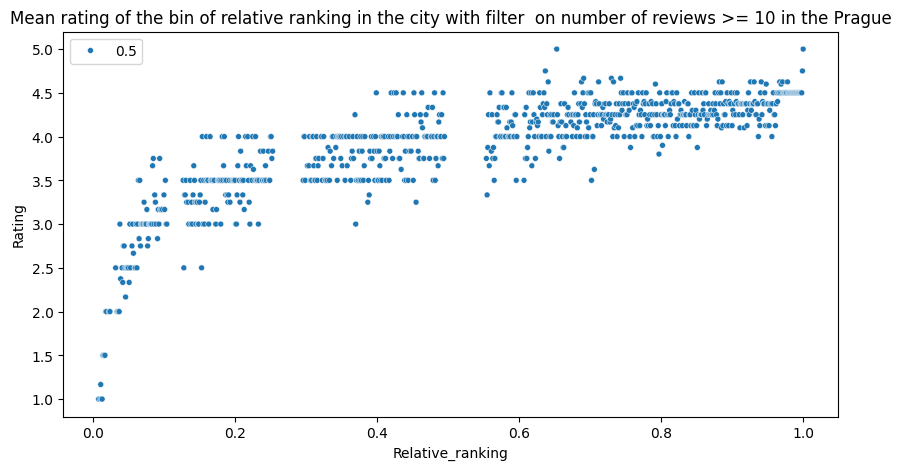

In [ ]:
t = data[(data["Number of Reviews"] >= 10) & (data["City"]=="Prague")].groupby(data["Relative_ranking"].round(3))["Rating"].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.title("Mean rating of the bin of relative ranking in the city with filter  on number of reviews >= 10 in the Prague")
sns.scatterplot(data=t, x="Relative_ranking", y="Rating", size=0.5)

Lets filter on whole dataset

<Axes: title={'center': 'Mean rating of the bin of relative ranking in the city with filter  on number of reviews >= 10'}, xlabel='Relative_ranking', ylabel='Rating'>

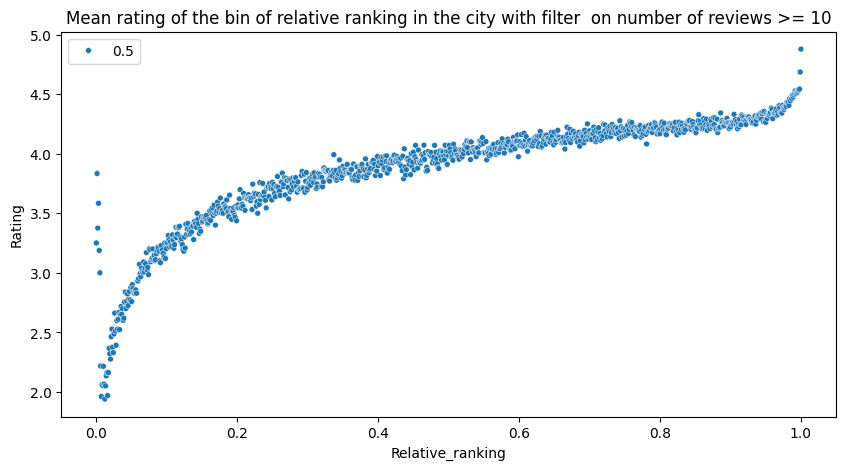

In [ ]:
t = data[data["Number of Reviews"] >= 10].groupby(data["Relative_ranking"].round(3))["Rating"].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.title("Mean rating of the bin of relative ranking in the city with filter  on number of reviews >= 10")
sns.scatterplot(data=t, x="Relative_ranking", y="Rating", size=0.5)

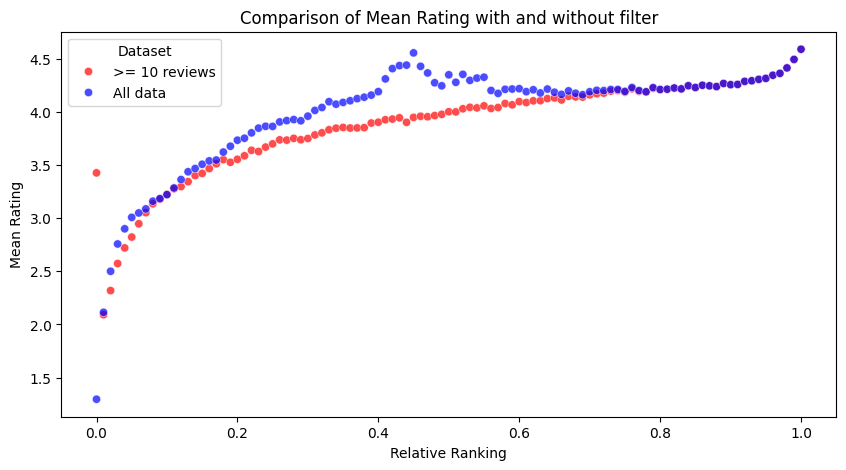

In [ ]:
t_filtered = data[data["Number of Reviews"] >= 10].groupby(data["Relative_ranking"].round(2))["Rating"].mean().reset_index()
t_filtered["Filter"] = ">= 10 reviews"

t_all = data.groupby(data["Relative_ranking"].round(2))["Rating"].mean().reset_index()
t_all["Filter"] = "All data"

t = pd.concat([t_filtered, t_all])

plt.figure(figsize=(10, 5))
plt.title("Comparison of Mean Rating with and without filter")

sns.scatterplot(
    data=t,
    x="Relative_ranking",
    y="Rating",
    hue="Filter",
    palette={"All data": "blue", ">= 10 reviews": "red"},
    alpha=0.7
)

plt.xlabel("Relative Ranking")
plt.ylabel("Mean Rating")
plt.legend(title="Dataset")
plt.show()

Plot became smoother. We can see, that under 60 percentile mean rating is lesser. "Strange" area desapeared.

We can see dependancy of those two features, but it is not linear. It remindes log function, so if we will use linear models, maybe better to create new feature with exp(relative_ranking). Also with taking into account highest percentiles it could be cubic parabola

<Axes: title={'center': 'Naumber of reviews and mean rating'}, xlabel='Number of Reviews', ylabel='Rating'>

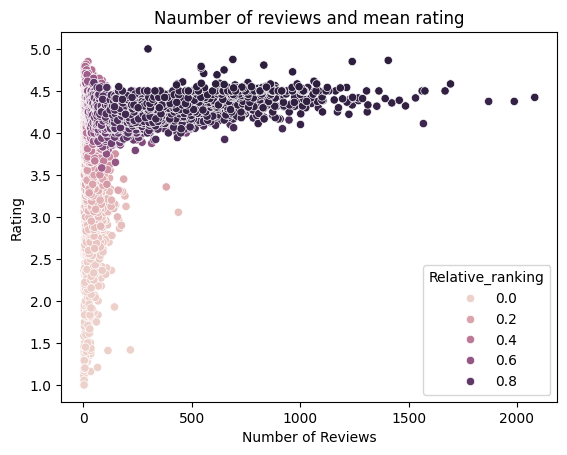

In [ ]:
t = data.groupby(data["Relative_ranking"].round(4))[["Rating", "Number of Reviews"]].mean().reset_index()
plt.title("Naumber of reviews and mean rating")
sns.scatterplot(data=t, x="Number of Reviews", y="Rating", hue="Relative_ranking")

Restaurants that have huge amount of reviews will have good rating(>4.0) and will be on the high position in the ranking

<Axes: title={'center': 'Mean rating of the bin of relative ranking in the city'}, xlabel='Relative_ranking', ylabel='Rating'>

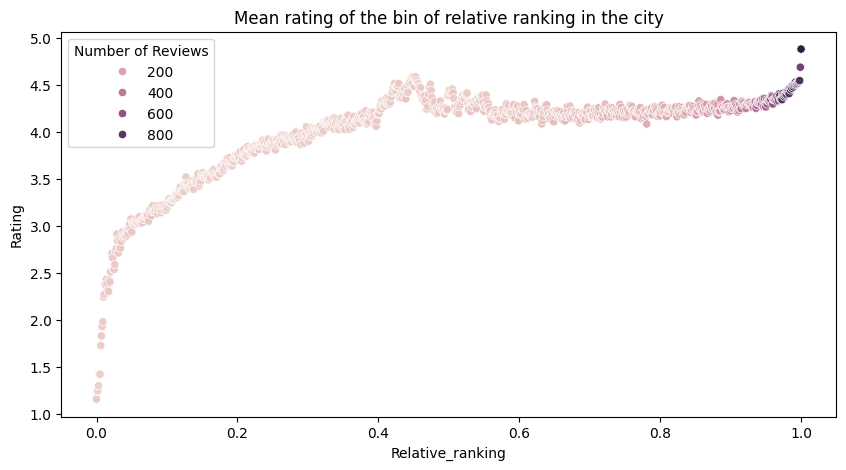

In [ ]:
t = data.groupby(data["Relative_ranking"].round(3))[["Rating", "Number of Reviews"]].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.title("Mean rating of the bin of relative ranking in the city")
sns.scatterplot(data=t, x="Relative_ranking", y="Rating", hue="Number of Reviews")

<Axes: title={'center': 'Mean rating of the bin of relative ranking in the city with filter  on number of reviews <= 50'}, xlabel='Relative_ranking', ylabel='Rating'>

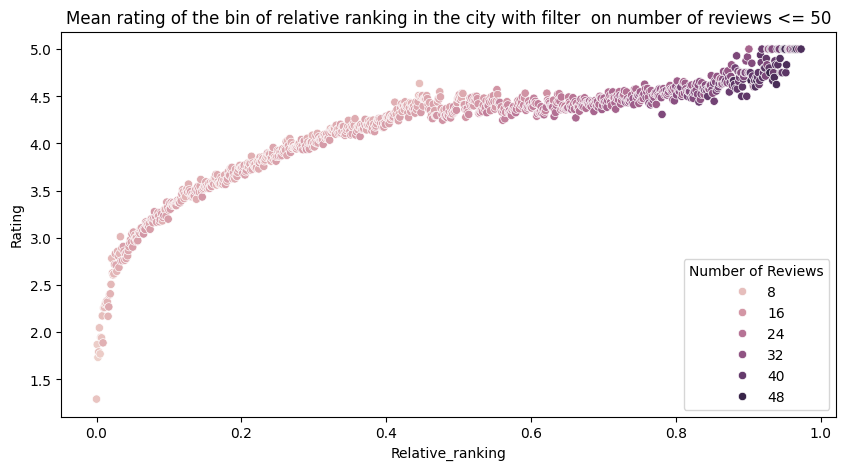

In [ ]:
t = data[data["Number of Reviews"] <= 50].groupby(data["Relative_ranking"].round(3))[["Rating", "Number of Reviews"]].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.title("Mean rating of the bin of relative ranking in the city with filter  on number of reviews <= 50")
sns.scatterplot(data=t, x="Relative_ranking", y="Rating", hue="Number of Reviews")

Even with filter on max number of reviews restaurants with highest rating has higher number of reviews

<Axes: title={'center': 'Mean rating of the bin of relative ranking in the city'}, xlabel='Relative_ranking', ylabel='Rating'>

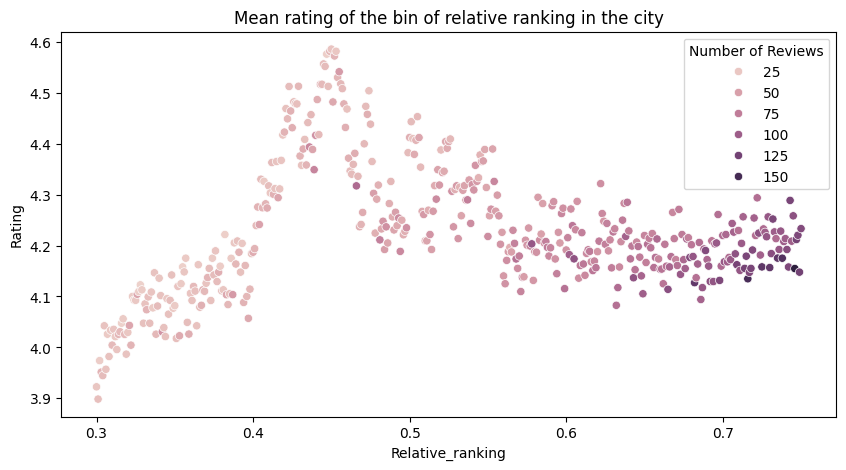

In [ ]:
t = data[(data["Relative_ranking"] >= 0.3) & (data["Relative_ranking"] <= 0.75)].groupby(data["Relative_ranking"].round(3))[["Rating", "Number of Reviews"]].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.title("Mean rating of the bin of relative ranking in the city")
sns.scatterplot(data=t, x="Relative_ranking", y="Rating", hue="Number of Reviews")

In the "strange area" is located point, where restaurants begin to have normal amount of reviews

<Axes: title={'center': 'Mean number of reviews of the bin of relative ranking in the city'}, xlabel='Relative_ranking', ylabel='Number of Reviews'>

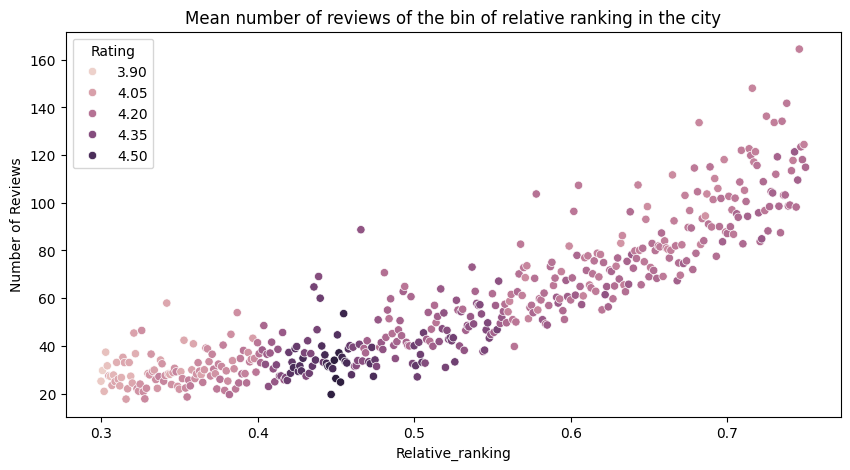

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Mean number of reviews of the bin of relative ranking in the city")
sns.scatterplot(data=t, x="Relative_ranking", y="Number of Reviews", hue="Rating")

This polt allows to repeatadly note dependancy between Relative_ranking, Rating and Number of reviews

<Axes: xlabel='population_city', ylabel='Number of Reviews'>

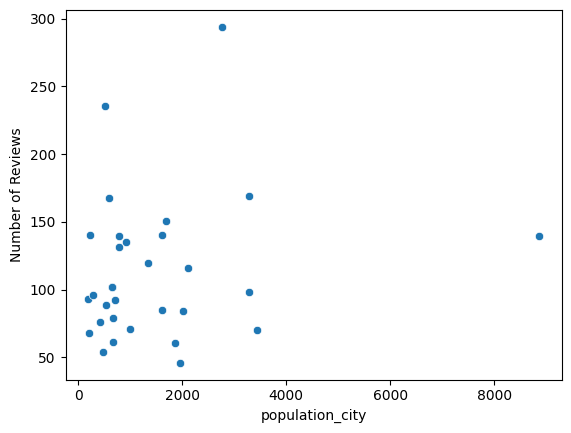

In [ ]:
sns.scatterplot(data=data.groupby(["population_city", "City"])["Number of Reviews"].mean().reset_index(), x="population_city", y="Number of Reviews")

<Axes: xlabel='Rating', ylabel='Relative_ranking'>

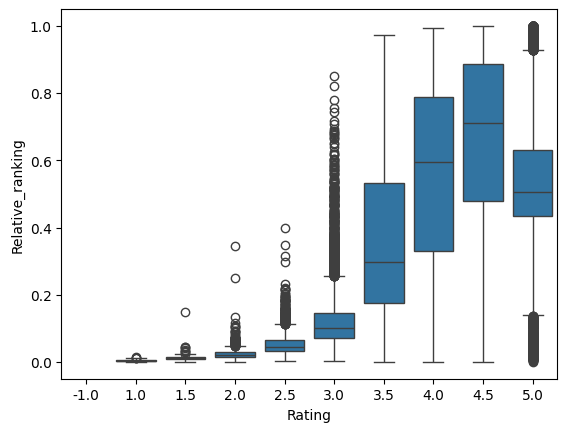

In [ ]:
sns.boxplot(data=data, x="Rating", y="Relative_ranking")

<Axes: xlabel='Rating', ylabel='Relative_ranking'>

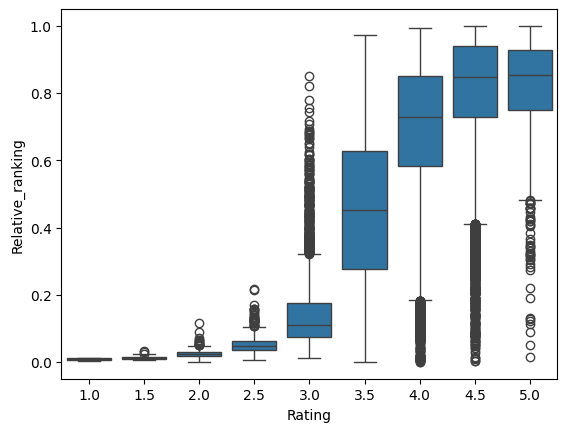

In [ ]:
sns.boxplot(data=data[data["Number of Reviews"] >= 20], x="Rating", y="Relative_ranking")

<Axes: title={'center': 'Mean rating of restaurants in each city'}, xlabel='Rating', ylabel='City'>

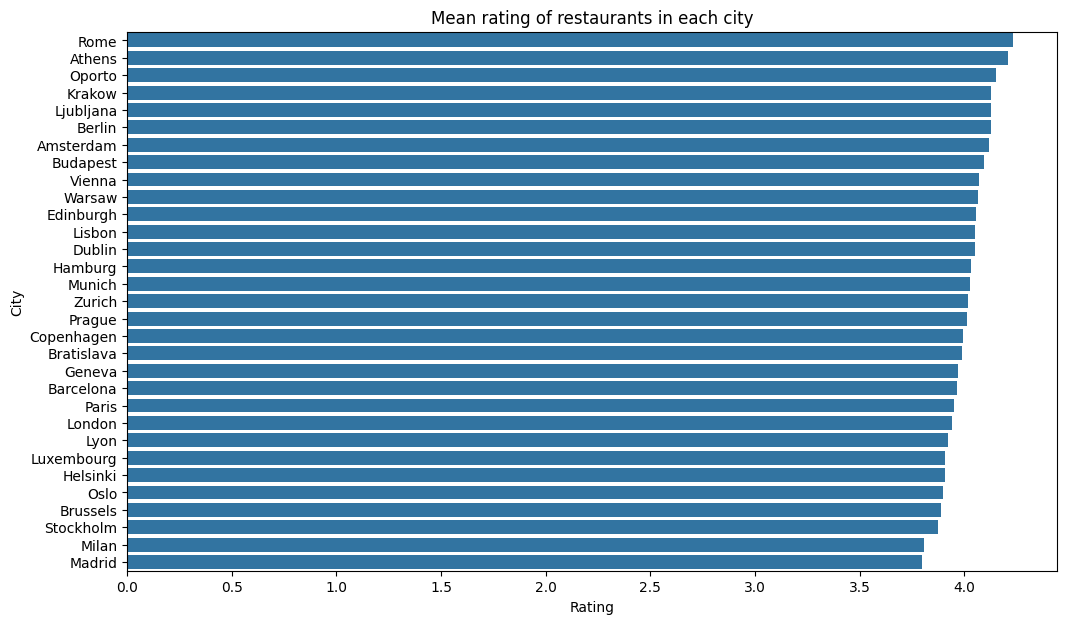

In [ ]:
plt.figure(figsize=(12, 7))
plt.title("Mean rating of restaurants in each city")
sns.barplot(data=data.groupby("City")["Rating"].mean().reset_index().sort_values(by="Rating", ascending=False), y="City", x="Rating")

Mean raating of restaurants in the sities ranges from 3.7 to 4.1. The best restaurants are in Rome, Athens, Oporto. The least delishace are Madrid, Milan, Stockholm. There is hard to say something about  mean rating and geographiscal location.

<Axes: xlabel='Price Range', ylabel='Rating'>

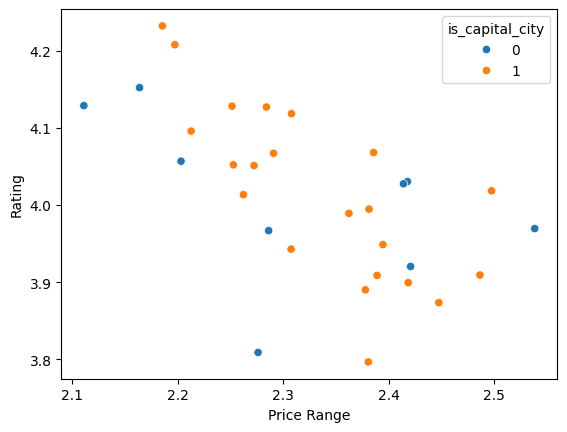

In [ ]:
sns.scatterplot(data.groupby(["City", "is_capital_city"])[["Rating", "Price Range"]].mean().reset_index().sort_values(by="Rating", ascending=False), y="Rating", x="Price Range", hue="is_capital_city")

There are interesting dependacy on the plot. More cheaper city - higher rating. By the way I would not to declare something, becouse of high variance

### Cuisine Style details

In [ ]:
tmp = data[data["Italian"] == 1].groupby(by="City")["Rating"].mean().reset_index().sort_values(by="Rating", ascending=False)
tmp

City    Rating
26        Rome  4.182426
1       Athens  4.175439
3       Berlin  4.124848
0    Amsterdam  4.086387
2    Barcelona  4.084034
25      Prague  4.082071
21      Munich  4.079572
6     Budapest  4.078947
13      Krakow  4.063492
8       Dublin  4.062842
9    Edinburgh  4.054487
4   Bratislava  4.050000
16      London  4.031233
30      Zurich  4.028000
29      Warsaw  4.027675
22      Oporto  4.023810
11     Hamburg  4.008993
14      Lisbon  3.997253
7   Copenhagen  3.993023
24       Paris  3.968182
17  Luxembourg  3.942478
28      Vienna  3.938028
5     Brussels  3.937234
18        Lyon  3.903614
10      Geneva  3.885463
15   Ljubljana  3.881818
23        Oslo  3.878788
19      Madrid  3.872437
27   Stockholm  3.864865
20       Milan  3.852235
12    Helsinki  3.709302

In [ ]:
cities_c = ['Amsterdam_count', 'Athens_count', 'Barcelona_count', 'Berlin_count', 'Bratislava_count',
       'Brussels_count', 'Budapest_count', 'Copenhagen_count', 'Dublin_count', 'Edinburgh_count',
       'Geneva_count', 'Hamburg_count', 'Helsinki_count', 'Krakow_count', 'Lisbon_count', 'Ljubljana_count',
       'London_count', 'Luxembourg_count', 'Lyon_count', 'Madrid_count', 'Milan_count', 'Munich_count',
       'Oporto_count', 'Oslo_count', 'Paris_count', 'Prague_count', 'Rome_count', 'Stockholm_count', 'Vienna_count',
       'Warsaw_count', 'Zurich_count']
cities_mr = ['Amsterdam_mean_rating', 'Athens_mean_rating', 'Barcelona_mean_rating', 'Berlin_mean_rating', 'Bratislava_mean_rating',
       'Brussels_mean_rating', 'Budapest_mean_rating', 'Copenhagen_mean_rating', 'Dublin_mean_rating', 'Edinburgh_mean_rating',
       'Geneva_mean_rating', 'Hamburg_mean_rating', 'Helsinki_mean_rating', 'Krakow_mean_rating', 'Lisbon_mean_rating', 'Ljubljana_mean_rating',
       'London_mean_rating', 'Luxembourg_mean_rating', 'Lyon_mean_rating', 'Madrid_mean_rating', 'Milan_mean_rating', 'Munich_mean_rating',
       'Oporto_mean_rating', 'Oslo_mean_rating', 'Paris_mean_rating', 'Prague_mean_rating', 'Rome_mean_rating', 'Stockholm_mean_rating', 'Vienna_mean_rating',
       'Warsaw_mean_rating', 'Zurich_mean_rating']
other_cols = ['Rating', 'Relative_ranking',  'Price Range', 'Number of Reviews', 'days_since_last_review', 'price_ranking_was_nan']

In [ ]:
t_cuisines = pd.DataFrame(np.nan, columns=cities_c + cities_mr + other_cols, index=cusines)
t_cuisines.tail()

Amsterdam_count  Athens_count  Barcelona_count  Berlin_count  \
Swedish                NaN           NaN              NaN           NaN   
Danish                 NaN           NaN              NaN           NaN   
African                NaN           NaN              NaN           NaN   
Slovenian              NaN           NaN              NaN           NaN   
Kosher                 NaN           NaN              NaN           NaN   

           Bratislava_count  Brussels_count  Budapest_count  Copenhagen_count  \
Swedish                 NaN             NaN             NaN               NaN   
Danish                  NaN             NaN             NaN               NaN   
African                 NaN             NaN             NaN               NaN   
Slovenian               NaN             NaN             NaN               NaN   
Kosher                  NaN             NaN             NaN               NaN   

           Dublin_count  Edinburgh_count  ...  Stockholm_mean_rating  \
Swedish             NaN              NaN  ...                    NaN   
Danish              NaN              NaN  ...                    NaN   
African             NaN              NaN  ...                    NaN   
Slovenian           NaN              NaN  ...                    NaN   
Kosher              NaN              NaN  ...                    NaN   

           Vienna_mean_rating  Warsaw_mean_rating  Zurich_mean_rating  Rating  \
Swedish                   NaN                 NaN                 NaN     NaN   
Danish                    NaN                 NaN                 NaN     NaN   
African                   NaN                 NaN                 NaN     NaN   
Slovenian                 NaN                 NaN                 NaN     NaN   
Kosher                    NaN                 NaN                 NaN     NaN   

           Relative_ranking  Price Range  Number of Reviews  \
Swedish                 NaN          NaN                NaN   
Danish                  NaN          NaN                NaN   
African                 NaN          NaN                NaN   
Slovenian               NaN          NaN                NaN   
Kosher                  NaN          NaN                NaN   

           days_since_last_review  price_ranking_was_nan  
Swedish                       NaN                    NaN  
Danish                        NaN                    NaN  
African                       NaN                    NaN  
Slovenian                     NaN                    NaN  
Kosher                        NaN                    NaN  

[5 rows x 68 columns]

In [ ]:
for cus in cusines:
  tmp = data[data[cus] == 1].groupby(by="City")["Rating"].agg(["count", "mean"]).reset_index()
  for city in tmp["City"].unique():
    t_cuisines.loc[cus, f"{city}_count"] = tmp[tmp["City"] == city]["count"].values[0]
    t_cuisines.loc[cus, f"{city}_mean_rating"] = tmp[tmp["City"] == city]["mean"].values[0]
  t_cuisines.loc[cus, "Rating"] = data[data[cus] == 1]["Rating"].mean()
  t_cuisines.loc[cus, "Relative_ranking"] = data[data[cus] == 1]["Relative_ranking"].mean()
  t_cuisines.loc[cus, "Price Range"] = data[data[cus] == 1]["Price Range"].mean()
  t_cuisines.loc[cus, "Number of Reviews"] = data[data[cus] == 1]["Number of Reviews"].mean()
  t_cuisines.loc[cus, "days_since_last_review"] = data[data[cus] == 1]["days_since_last_review"].mean()
  t_cuisines.loc[cus, "price_ranking_was_nan"] = data[data[cus] == 1]["price_ranking_was_nan"].mean()
t_cuisines["Total count"] = t_cuisines[cities_c].sum(axis=1)
t_cuisines = t_cuisines.reset_index().rename(columns={"index": "Cuisine"})
t_cuisines.head()

Cuisine  Amsterdam_count  Athens_count  Barcelona_count  \
0  Vegetarian Friendly           1348.0         444.0           2036.0   
1             European           1463.0         202.0           1746.0   
2        Mediterranean            351.0         724.0           3073.0   
3              Italian            382.0         114.0            595.0   
4        Vegan Options            539.0         296.0           1037.0   

   Berlin_count  Bratislava_count  Brussels_count  Budapest_count  \
0        1773.0             105.0           702.0           728.0   
1        1322.0             309.0          1111.0          1278.0   
2         707.0              37.0           409.0           136.0   
3         825.0              80.0           470.0           266.0   
4         649.0              48.0           243.0           310.0   

   Copenhagen_count  Dublin_count  ...  Vienna_mean_rating  \
0             494.0         726.0  ...            4.119095   
1             750.0         688.0  ...            4.022727   
2              84.0          91.0  ...            4.068536   
3             215.0         183.0  ...            3.938028   
4             191.0         349.0  ...            4.199681   

   Warsaw_mean_rating  Zurich_mean_rating    Rating  Relative_ranking  \
0            4.216075            4.082248  4.129063          0.755291   
1            4.111842            4.054383  4.042175          0.652314   
2            4.088235            4.090734  4.065533          0.655147   
3            4.027675            4.028000  4.023811          0.566183   
4            4.293605            4.161677  4.222205          0.816461   

   Price Range  Number of Reviews  days_since_last_review  \
0     2.339112         288.279637              132.027838   
1     2.420493         230.313523              185.271034   
2     2.347542         245.533216              200.404926   
3     2.272408         206.626362              267.379022   
4     2.306288         385.476014              111.391325   

   price_ranking_was_nan  Total count  
0               0.011310      32306.0  
1               0.089135      29567.0  
2               0.058335      17968.0  
3               0.129812      17198.0  
4               0.010454      12979.0  

[5 rows x 70 columns]

In [ ]:
data[data["Vegetarian Friendly"] == 1]["Rating"].agg(["count", "mean"])

count    32306.000000
mean         4.129063
Name: Rating, dtype: float64

In [ ]:
data[(data["Vegetarian Friendly"] == 1) & (data["City"] == "Athens")]["Rating"].agg(["count", "mean"])

count    444.000000
mean       4.300676
Name: Rating, dtype: float64

In [ ]:
t_cuisines[t_cuisines["Cuisine"] == "Vegetarian Friendly"][["Athens_count", "Athens_mean_rating"]]

Athens_count  Athens_mean_rating
0         444.0            4.300676

<Axes: xlabel='Number of Reviews', ylabel='Rating'>

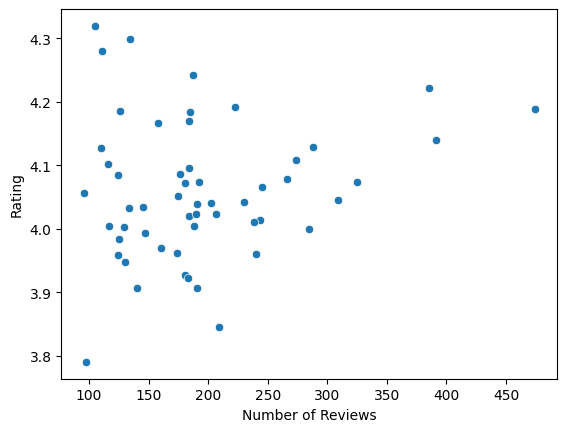

In [ ]:
sns.scatterplot(data=t_cuisines, x="Number of Reviews", y="Rating")

<Axes: xlabel='Total count', ylabel='Rating'>

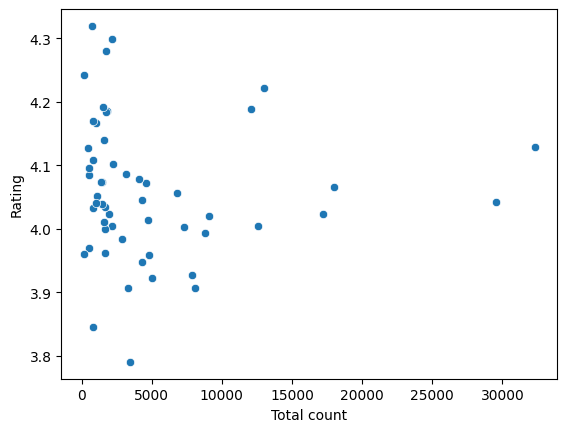

In [ ]:
sns.scatterplot(data=t_cuisines, x="Total count", y="Rating")

<Axes: title={'center': 'Mean Number of reviews of cuisine style'}, xlabel='Total count', ylabel='Cuisine'>

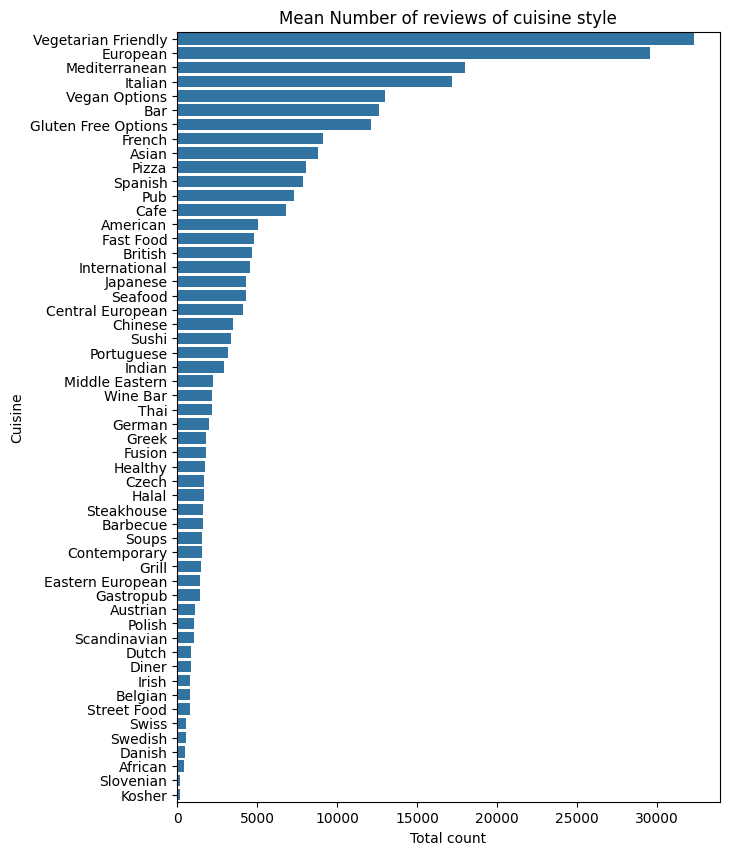

In [ ]:
plt.figure(figsize=(7, 10))
plt.title("Mean Number of reviews of cuisine style")
sns.barplot(data=t_cuisines.sort_values(by="Total count", ascending=False), x="Total count", y="Cuisine")

<Axes: title={'center': 'Mean rating of cuisine style'}, xlabel='Rating', ylabel='Cuisine'>

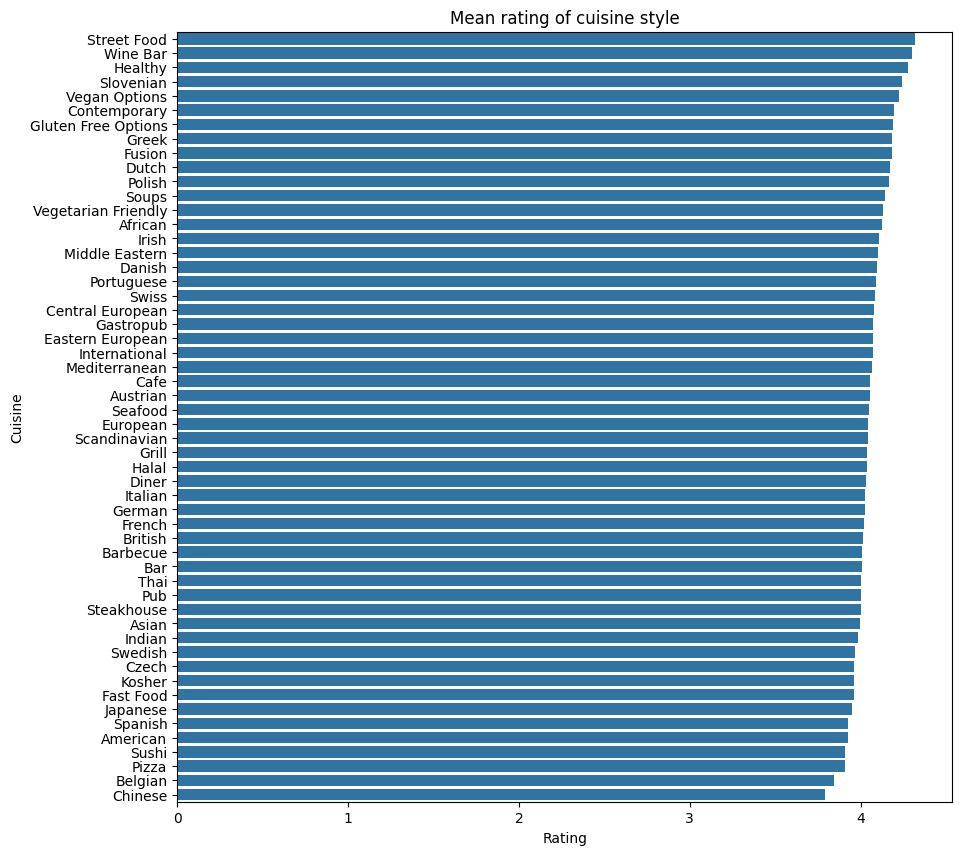

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("Mean rating of cuisine style")
sns.barplot(data=t_cuisines.sort_values(by="Rating", ascending=False), x="Rating", y="Cuisine")

<Axes: title={'center': 'Mean Relative rating of cuisine style'}, xlabel='Relative_ranking', ylabel='Cuisine'>

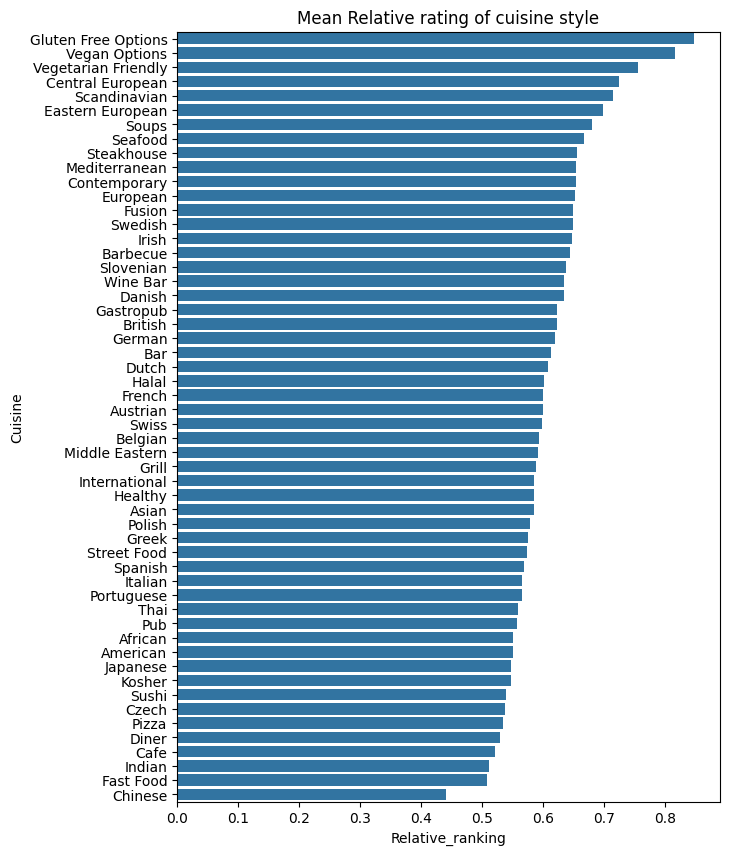

In [ ]:
plt.figure(figsize=(7, 10))
plt.title("Mean Relative rating of cuisine style")
sns.barplot(data=t_cuisines.sort_values(by="Relative_ranking", ascending=False), x="Relative_ranking", y="Cuisine")

<Axes: xlabel='Number of Reviews', ylabel='Rating'>

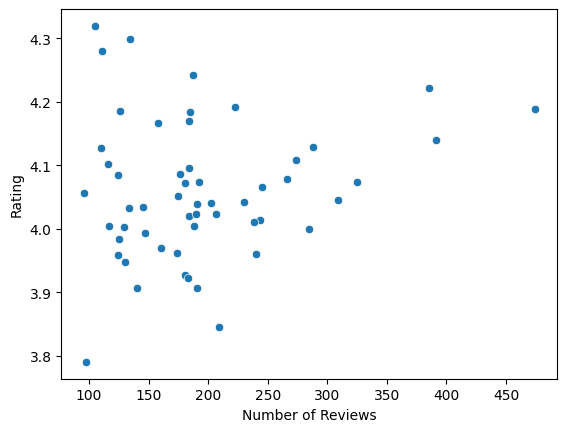

In [ ]:
sns.scatterplot(data=t_cuisines, x="Number of Reviews", y="Rating")

<Axes: title={'center': 'Mean Number of reviews of cuisine style'}, xlabel='Number of Reviews', ylabel='Cuisine'>

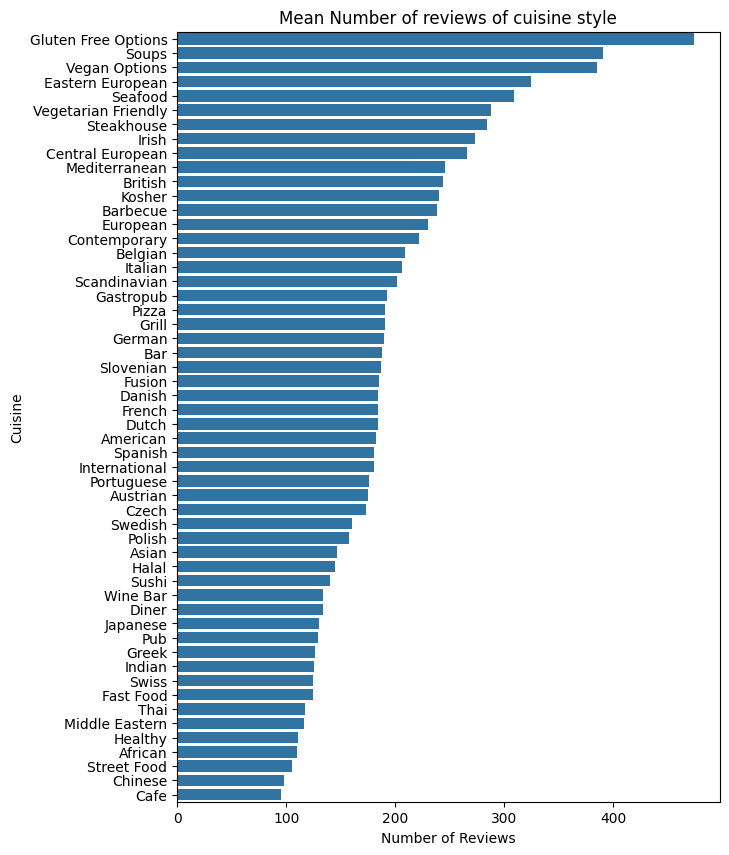

In [ ]:
plt.figure(figsize=(7, 10))
plt.title("Mean Number of reviews of cuisine style")
sns.barplot(data=t_cuisines.sort_values(by="Number of Reviews", ascending=False), x="Number of Reviews", y="Cuisine")

<Axes: title={'center': 'Mean Price range of cuisine style'}, xlabel='Price Range', ylabel='Cuisine'>

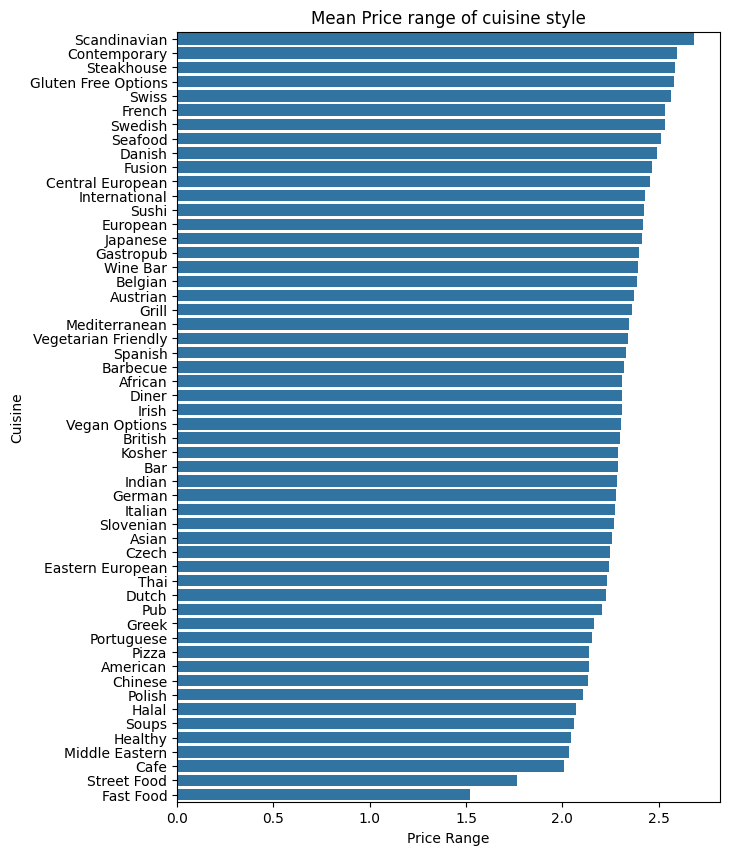

In [ ]:
plt.figure(figsize=(7, 10))
plt.title("Mean Price range of cuisine style")
sns.barplot(data=t_cuisines.sort_values(by="Price Range", ascending=False), x="Price Range", y="Cuisine")

<Axes: title={'center': 'Mean days_since_last_review of cuisine style'}, xlabel='days_since_last_review', ylabel='Cuisine'>

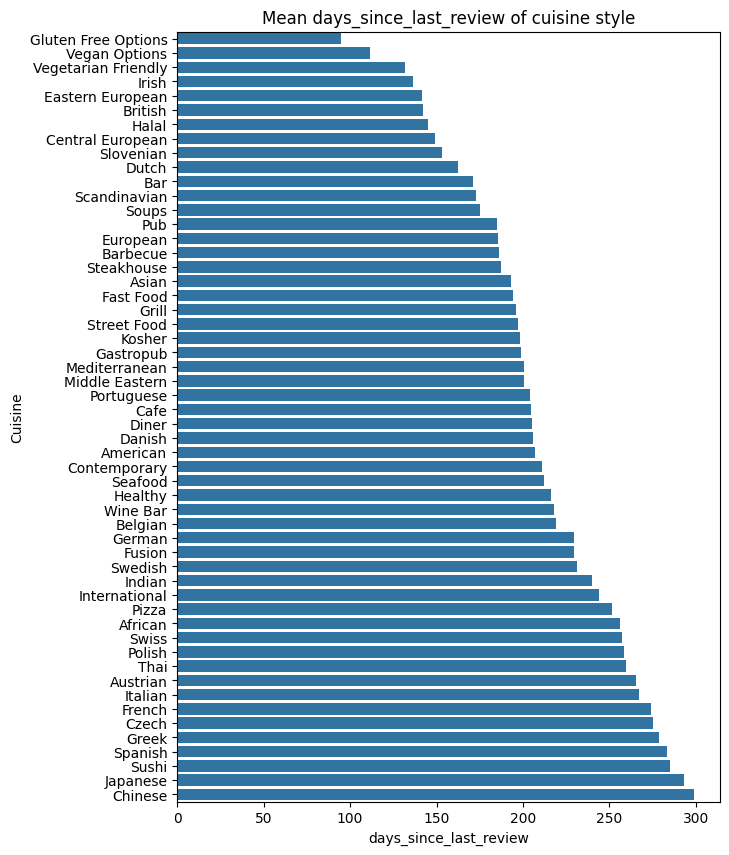

In [ ]:
plt.figure(figsize=(7, 10))
plt.title("Mean days_since_last_review of cuisine style")
sns.barplot(data=t_cuisines.sort_values(by="days_since_last_review"), x="days_since_last_review", y="Cuisine")

<Axes: title={'center': 'Mean price_ranking_was_nan of cuisine style'}, xlabel='price_ranking_was_nan', ylabel='Cuisine'>

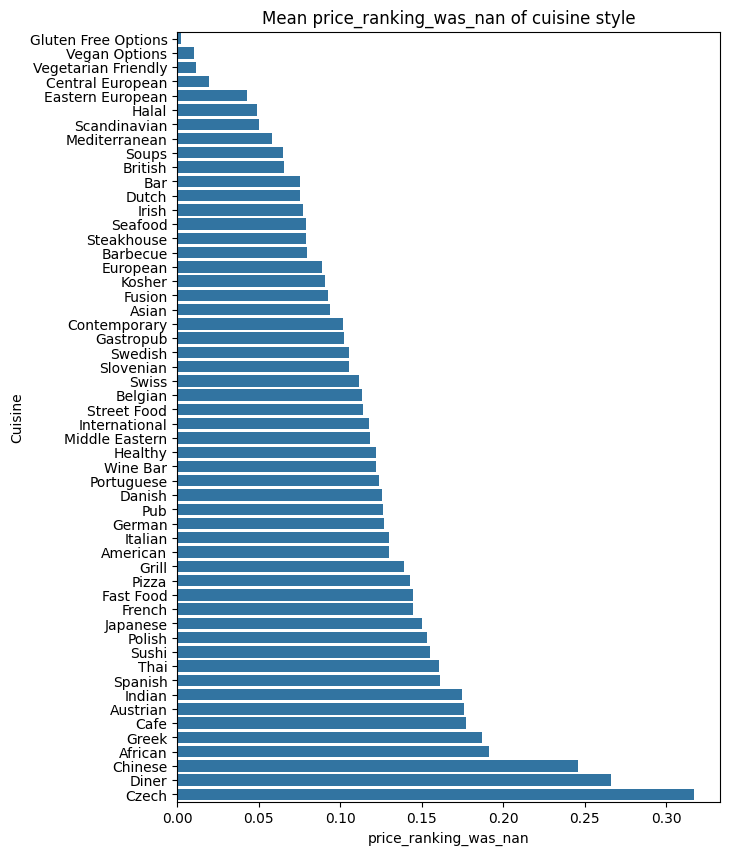

In [ ]:
plt.figure(figsize=(7, 10))
plt.title("Mean price_ranking_was_nan of cuisine style")
sns.barplot(data=t_cuisines.sort_values(by="price_ranking_was_nan"), x="price_ranking_was_nan", y="Cuisine")

<Axes: xlabel='Rome_mean_rating', ylabel='Rome_count'>

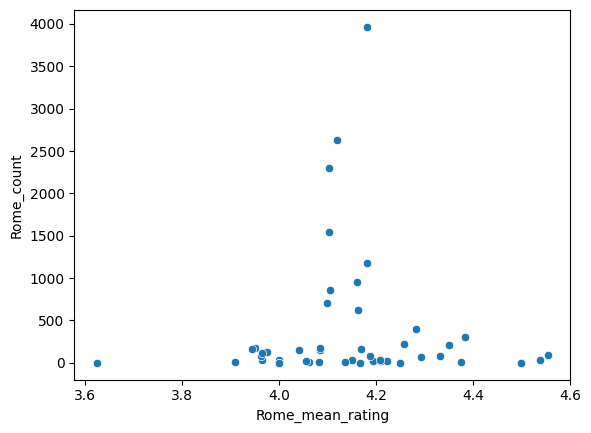

In [ ]:
sns.scatterplot(data=t_cuisines, x="Rome_mean_rating", y="Rome_count")

<Axes: xlabel='Athens_mean_rating', ylabel='Athens_count'>

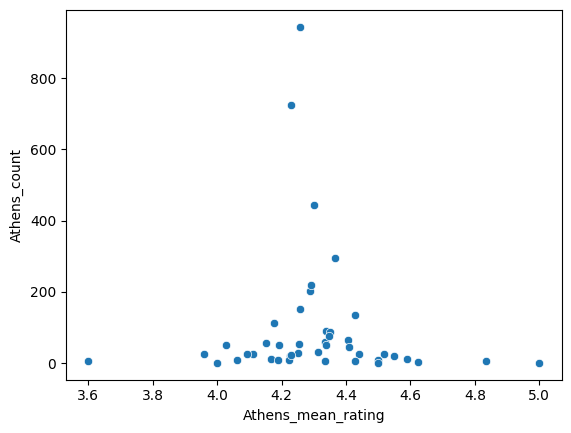

In [ ]:
sns.scatterplot(data=t_cuisines, x="Athens_mean_rating", y="Athens_count")

<Axes: xlabel='London_mean_rating', ylabel='London_count'>

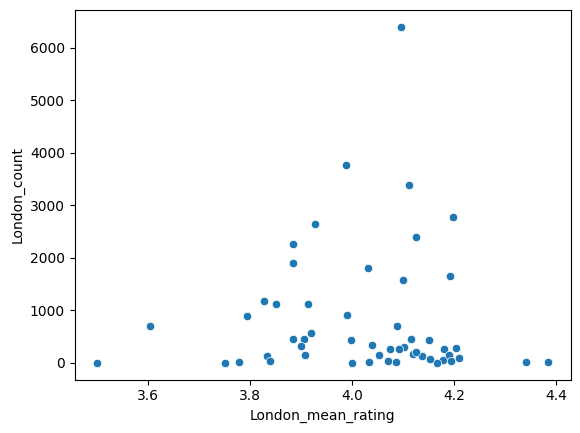

In [ ]:
sns.scatterplot(data=t_cuisines, x="London_mean_rating", y="London_count")

<Axes: title={'center': 'Count of reviews London of cuisine style'}, xlabel='London_count', ylabel='Cuisine'>

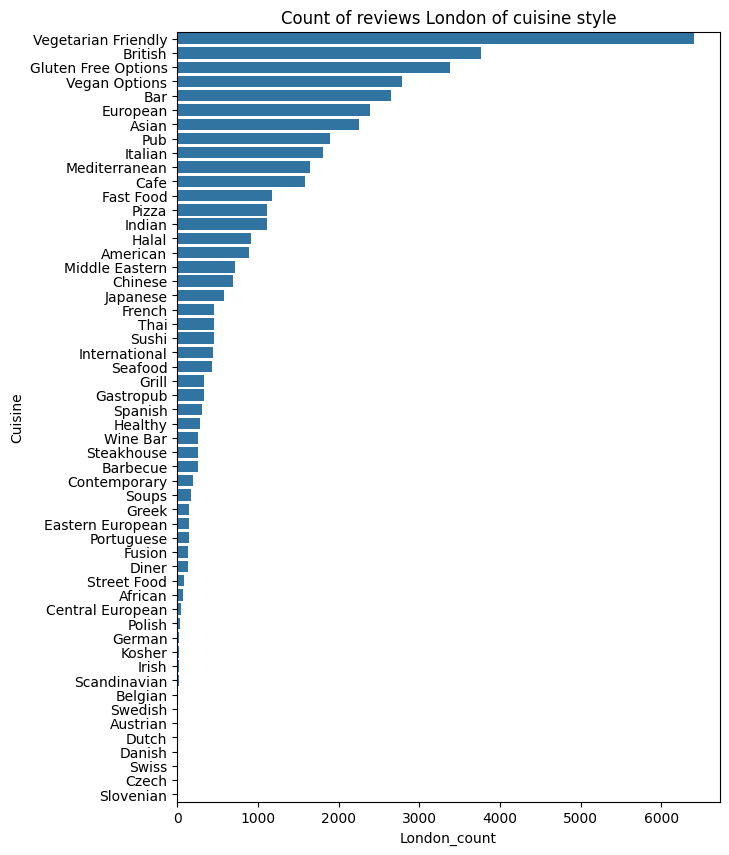

In [ ]:
plt.figure(figsize=(7, 10))
plt.title("Count of reviews London of cuisine style")
sns.barplot(data=t_cuisines.sort_values(by="London_count", ascending=False), x="London_count", y="Cuisine")

<Axes: title={'center': 'Mean Rating in London of cuisine style'}, xlabel='London_mean_rating', ylabel='Cuisine'>

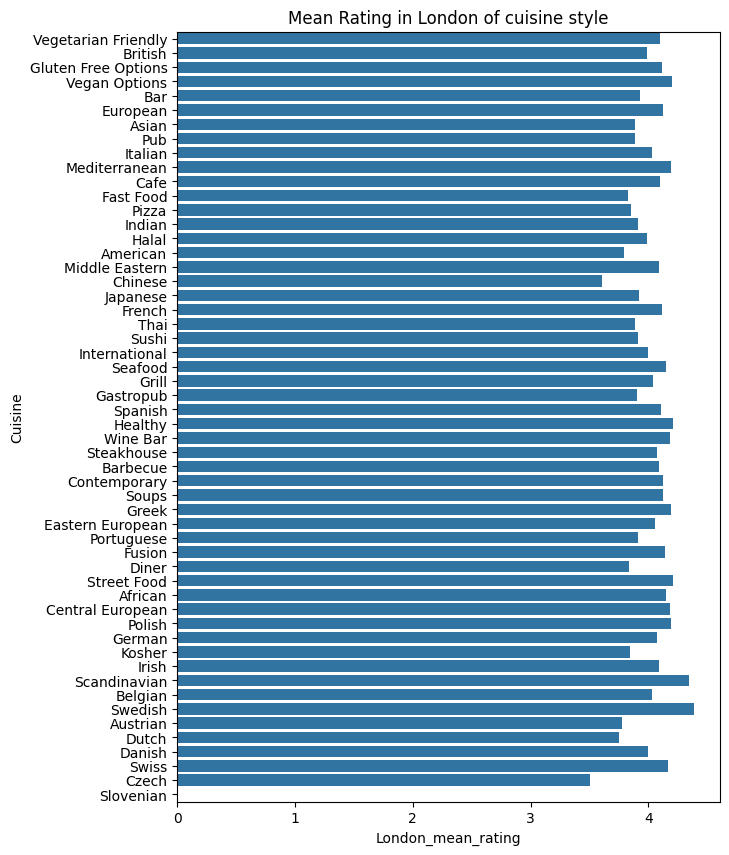

In [ ]:
plt.figure(figsize=(7, 10))
plt.title("Mean Rating in London of cuisine style")
sns.barplot(data=t_cuisines.sort_values(by="London_count", ascending=False), x="London_mean_rating", y="Cuisine")

<Axes: xlabel='Madrid_mean_rating', ylabel='Madrid_count'>

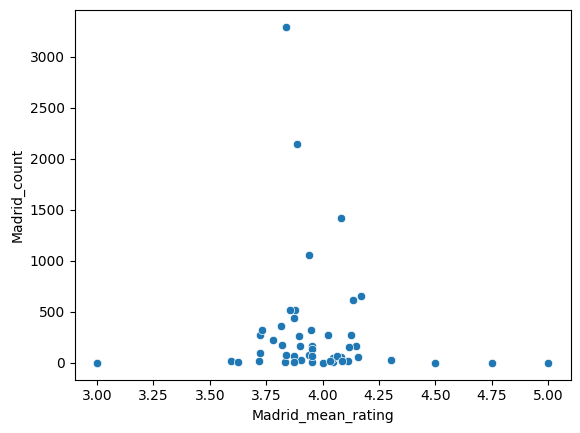

In [ ]:
sns.scatterplot(data=t_cuisines, x="Madrid_mean_rating", y="Madrid_count")

<Axes: xlabel='Rome_count', ylabel='Rome_mean_rating'>

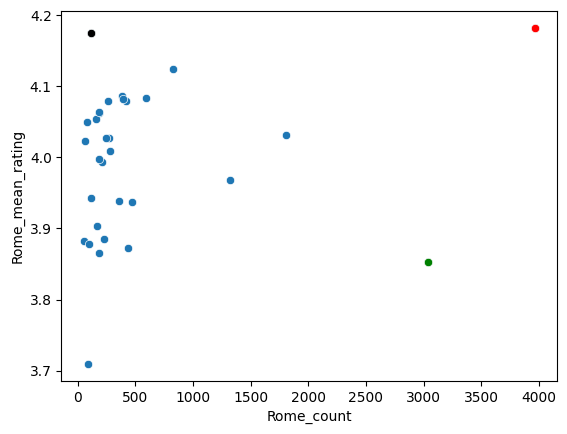

In [ ]:
sns.scatterplot(x=t_cuisines[t_cuisines["Cuisine"] == "Italian"][cities_c].values[0], y=t_cuisines[t_cuisines["Cuisine"] == "Italian"][cities_mr].values[0])
sns.scatterplot(x=t_cuisines[t_cuisines["Cuisine"] == "Italian"]["Rome_count"], y=t_cuisines[t_cuisines["Cuisine"] == "Italian"]["Rome_mean_rating"], color="red")
sns.scatterplot(x=t_cuisines[t_cuisines["Cuisine"] == "Italian"]["Milan_count"], y=t_cuisines[t_cuisines["Cuisine"] == "Italian"]["Milan_mean_rating"], color="green")
sns.scatterplot(x=t_cuisines[t_cuisines["Cuisine"] == "Italian"]["Athens_count"], y=t_cuisines[t_cuisines["Cuisine"] == "Italian"]["Athens_mean_rating"], color="black")

<Axes: xlabel='Prague_count', ylabel='Prague_mean_rating'>

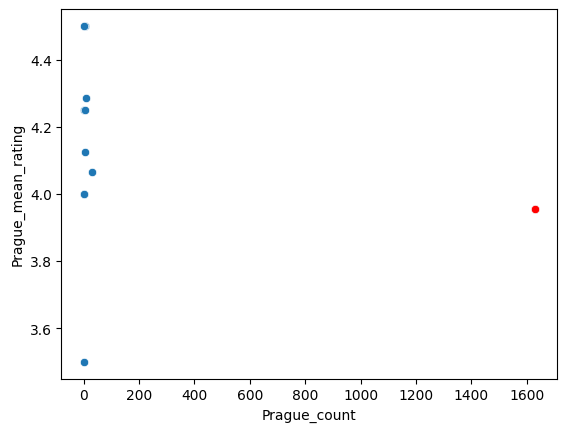

In [ ]:
sns.scatterplot(x=t_cuisines[t_cuisines["Cuisine"] == "Czech"][cities_c].values[0], y=t_cuisines[t_cuisines["Cuisine"] == "Czech"][cities_mr].values[0])
sns.scatterplot(x=t_cuisines[t_cuisines["Cuisine"] == "Czech"]["Prague_count"], y=t_cuisines[t_cuisines["Cuisine"] == "Czech"]["Prague_mean_rating"], color="red")

<Axes: xlabel='Vegetarian Friendly', ylabel='City'>

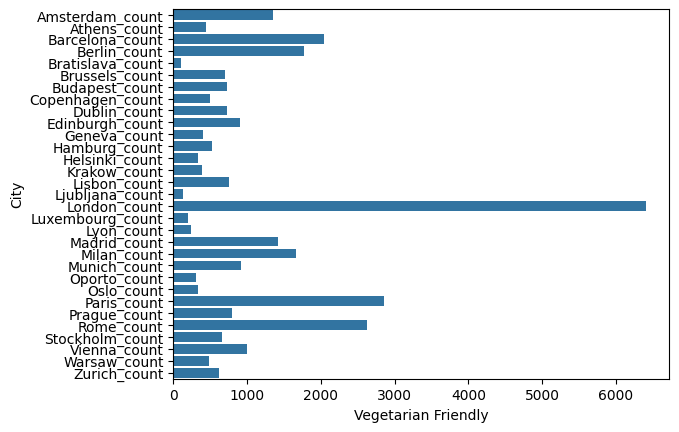

In [ ]:
sns.barplot(data=t_cuisines[t_cuisines["Cuisine"] == "Vegetarian Friendly"][cities_c].T.reset_index().rename(columns={"index": "City", 0:"Vegetarian Friendly"}),
            x="Vegetarian Friendly", y="City")

<Axes: xlabel='normalized', ylabel='City'>

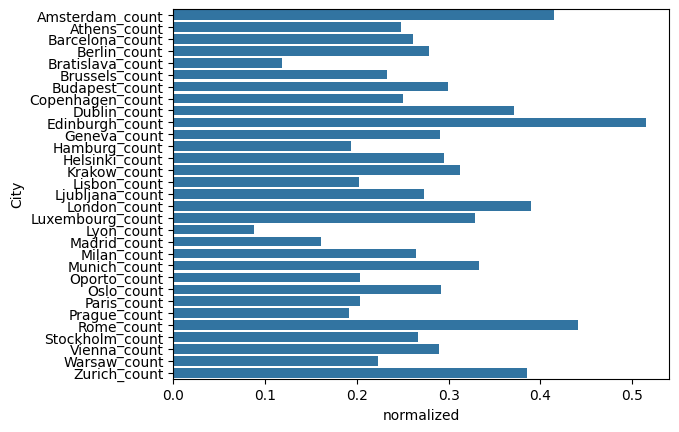

In [ ]:
t = t_cuisines[t_cuisines["Cuisine"] == "Vegetarian Friendly"][cities_c].T.reset_index().rename(columns={"index": "City", 0:"Vegetarian Friendly"})
t["normalized"] = t["Vegetarian Friendly"] / data.groupby(by="City")["Rating"].count().values
sns.barplot(data=t, x="normalized", y="City")

In [ ]:
data.groupby(by="is_local_cuisine")["Rating"].count()

is_local_cuisine
0    78247
1    37650
Name: Rating, dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

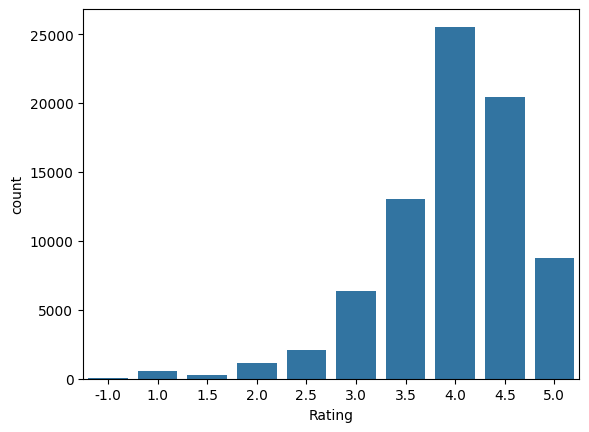

In [ ]:
sns.countplot(data[data["is_local_cuisine"] == 0], x="Rating")

<Axes: xlabel='Rating', ylabel='count'>

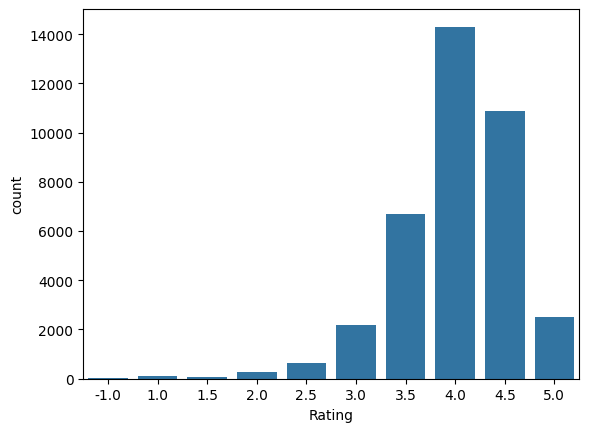

In [ ]:
sns.countplot(data[data["is_local_cuisine"] == 1], x="Rating")

### Other added features

<Axes: xlabel='days_between_reviews', ylabel='Number of Reviews'>

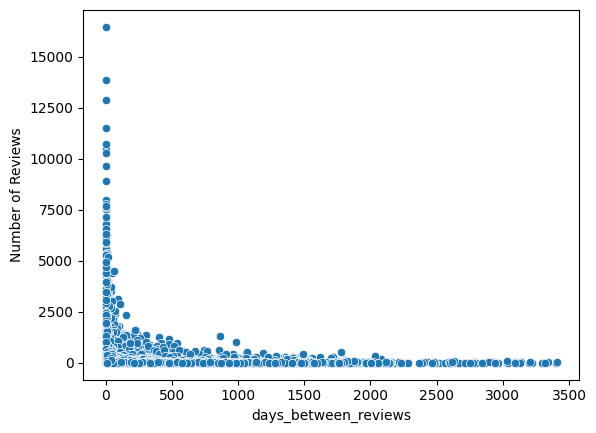

In [ ]:
sns.scatterplot(data=data, x="days_between_reviews", y="Number of Reviews")

<Axes: xlabel='days_since_last_review', ylabel='Number of Reviews'>

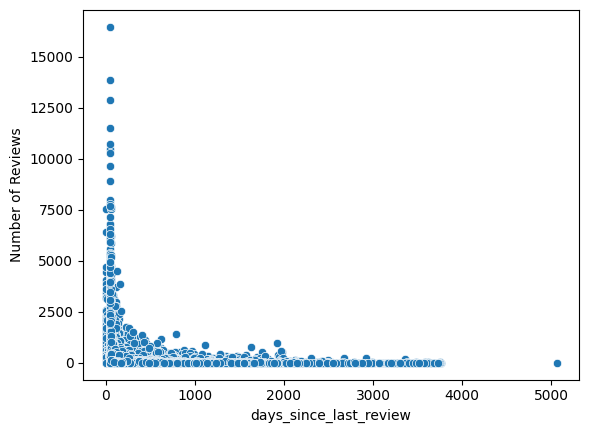

In [ ]:
sns.scatterplot(data=data, x="days_since_last_review", y= "Number of Reviews")

<Axes: xlabel='days_since_last_review', ylabel='mean'>

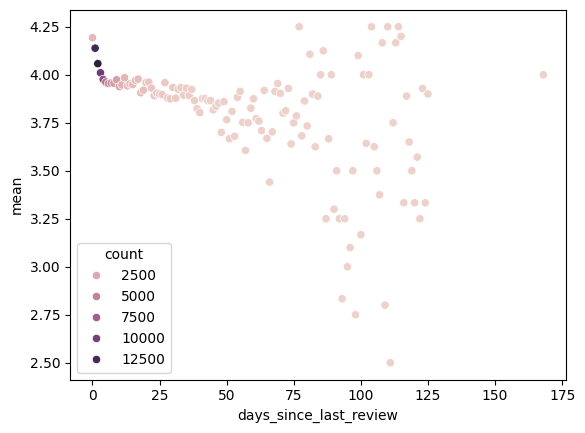

In [ ]:
sns.scatterplot(data=data.groupby(data["days_since_last_review"]//30)["Rating"].agg(["mean", "count"]).reset_index(), x="days_since_last_review", y="mean", hue="count")

<Axes: xlabel='days_between_reviews', ylabel='mean'>

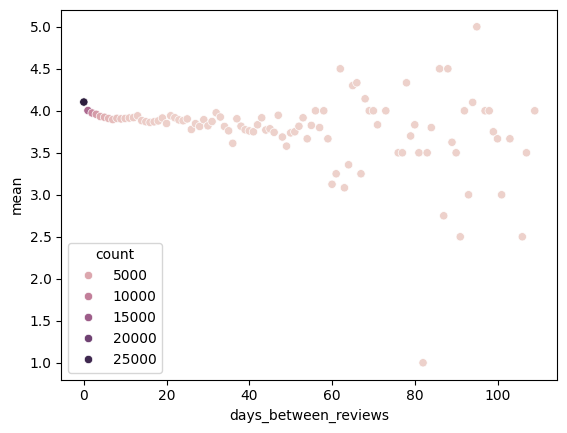

In [ ]:
sns.scatterplot(data=data.groupby(data["days_between_reviews"]//31)["Rating"].agg(["mean", "count"]).reset_index(), x="days_between_reviews", y="mean", hue="count")

In [ ]:
data.groupby(by="Cuisine_Style_was_nan")["Rating"].agg(["mean", "count"])

mean  count
Cuisine_Style_was_nan                 
0                      4.003341  89049
1                      3.934706  26848

In [ ]:
data.groupby(by='price_ranking_was_nan')["Rating"].agg(["mean", "count"])

mean  count
price_ranking_was_nan                 
0                      4.022067  75476
1                      3.922788  40421

### Correlation

In [ ]:
cor = data.corr()

<Axes: >

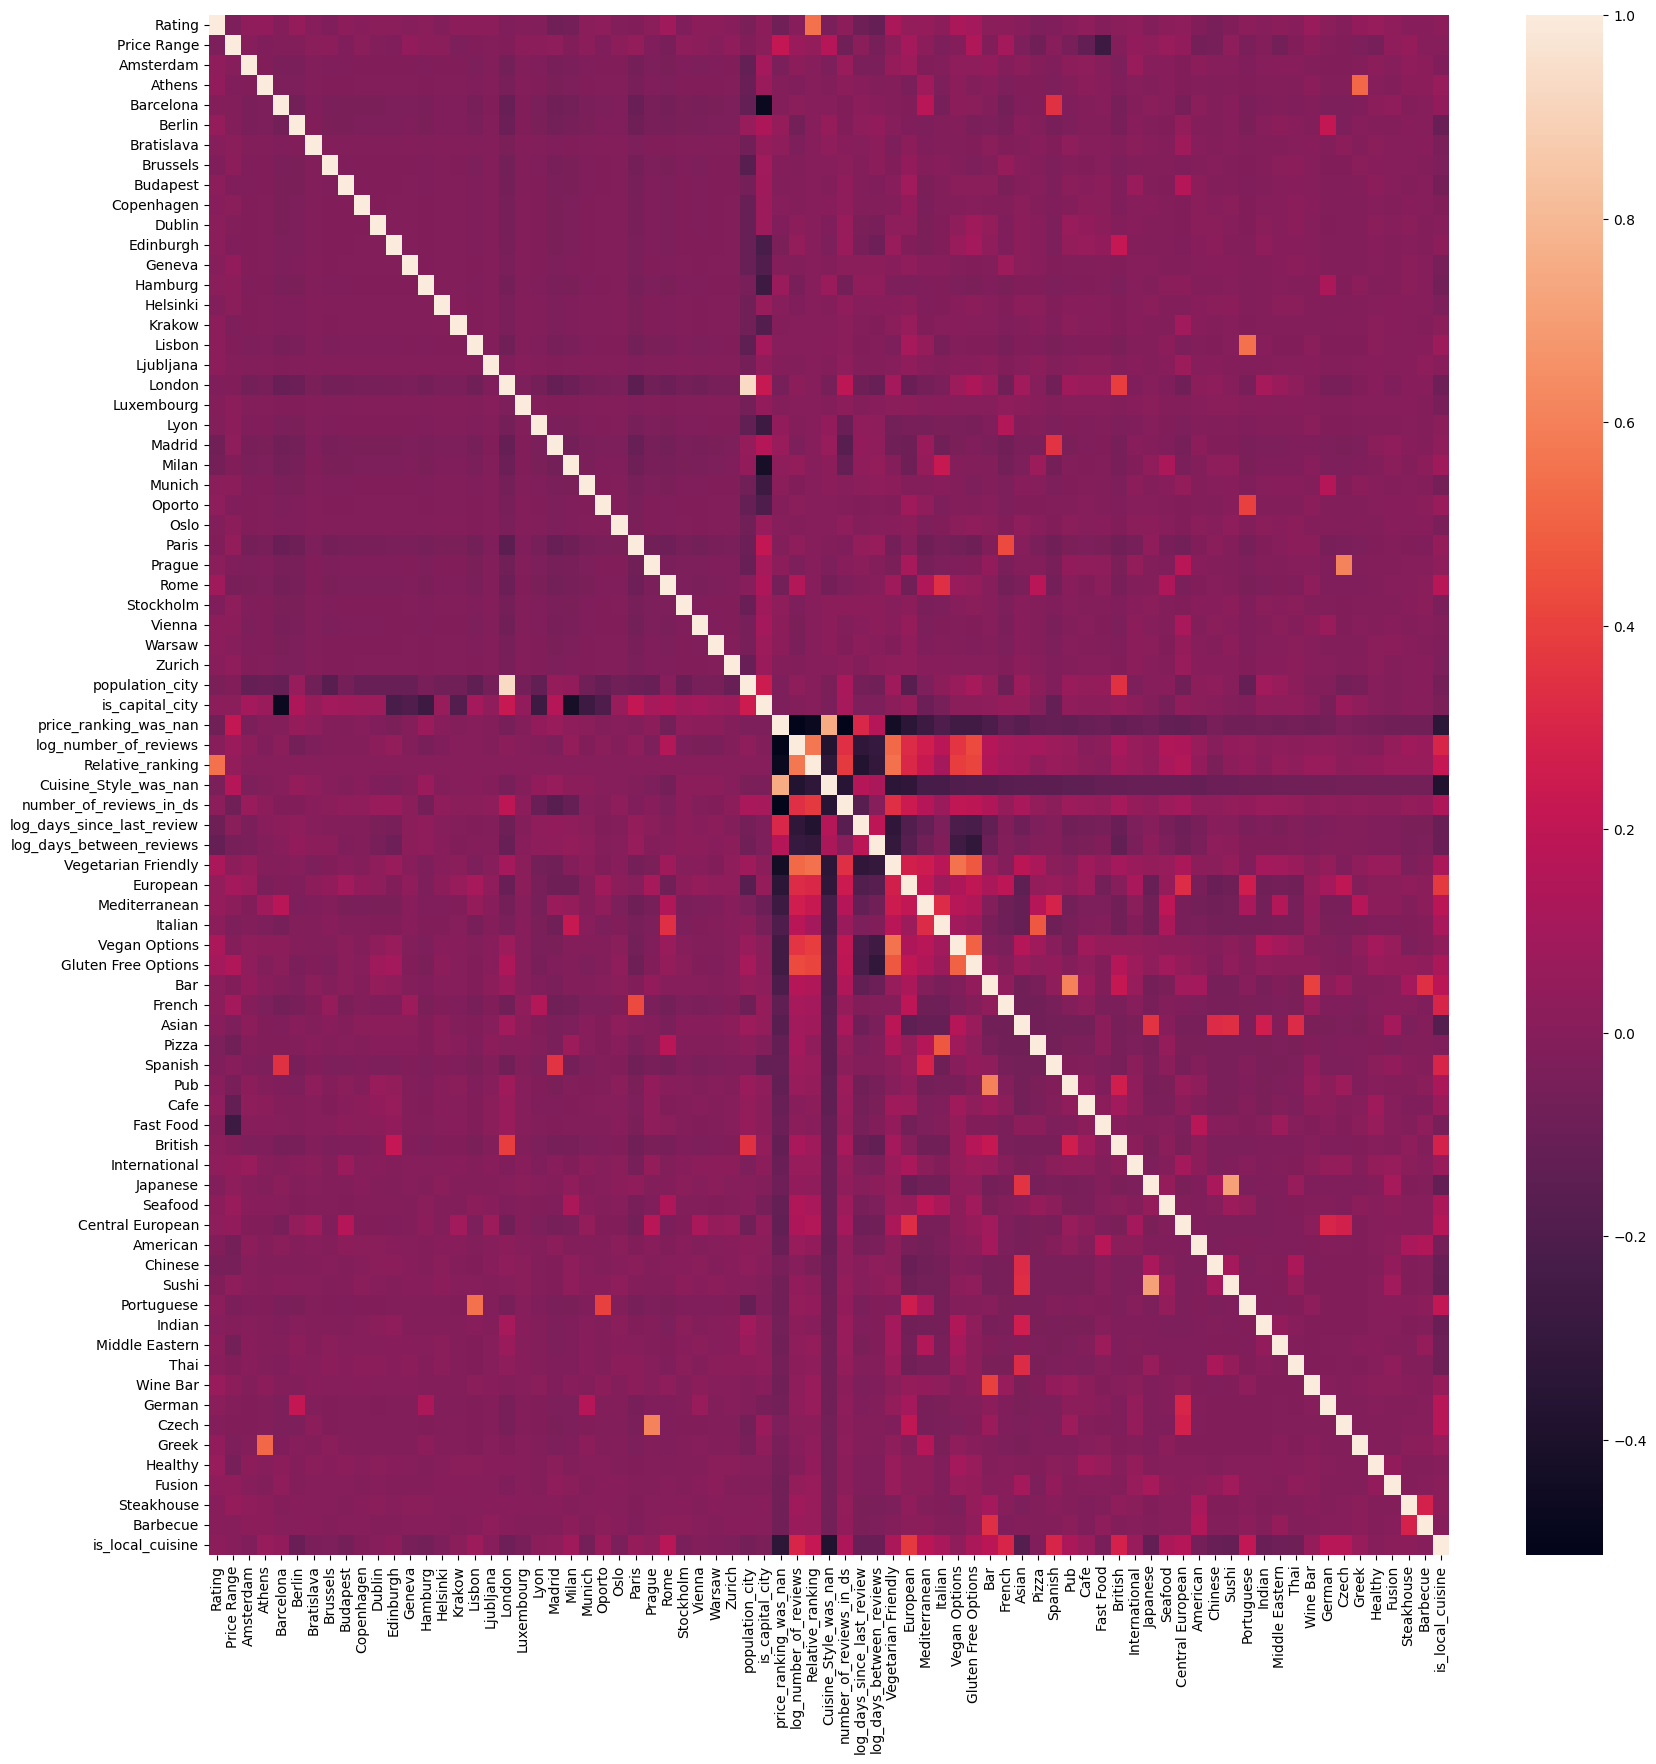

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(cor, annot=False)

#TODO
"export"ability of cuisine

Correlation matrix

Correlation matrix is large due to "City" feature that was one-hot encoded and set-valued feature "Cuisine Style".

# Data Preparation

In [ ]:
def parse_dates(dates):
    return [parser.parse(date) for date in dates if pd.notna(date)]

def time_to_now(row):
    if row["number_of_reviews_in_ds"] == 0 or not row["dates_of_review"]:
        return None
    dates = parse_dates(row["dates_of_review"])
    return datetime.now() - max(dates) if dates else None

def time_between_reviews(row):
    if row["number_of_reviews_in_ds"] == 0 or not row["dates_of_review"]:
        return None
    dates = parse_dates(row["dates_of_review"])
    return max(dates) - min(dates) if len(dates) > 1 else None

def data_prepare(dataset, capital_dict, city_population_dict, cuisines_list, local_cuisine):
  dataset = dataset.dropna(subset=["Rating"])
  dataset = dataset[dataset["Rating"] >= 1.0]
  dataset = pd.concat([dataset, pd.get_dummies(dataset["City"]).astype(np.float64)], axis=1)
  dataset["population_city"] = dataset["City"].apply(lambda x: city_population_dict[x])
  dataset["is_capital_city"] = dataset["City"].apply(lambda x: capital_dict[x])

  dataset["price_ranking_was_nan"] = dataset["Price Range"].isna().astype(int)
  dataset["Price Range"] = dataset["Price Range"].fillna(2.5)
  dataset["Number of Reviews"] = dataset["Number of Reviews"].fillna(dataset["Number of Reviews"].mean())
  dataset["log_number_of_reviews"] = dataset["Number of Reviews"].apply(np.log2)

  t = dataset.groupby(by="City")["Ranking"].max().reset_index()
  dataset = dataset.merge(t, on="City", how="left")
  dataset = dataset.rename(columns={"Ranking_x": "Ranking", "Ranking_y": "max_ranking_in_city"})
  dataset["Relative_ranking"] = 1 - dataset["Ranking"] / dataset["max_ranking_in_city"]
  dataset = dataset.dropna(subset=["Relative_ranking"])

  dataset["Cuisine_Style_was_nan"] = dataset["Cuisine Style"].isna().astype(int)
  dataset["Cuisine Style"] = dataset["Cuisine Style"].fillna("[]")

  dataset["Price Range"] = dataset["Price Range"].replace({"$$$$": 4, "$$ - $$$": 2.5, "$": 1})

  dataset["Reviews"] = dataset["Reviews"].fillna("[[], []]")
  dataset["dates_of_review"] = dataset["Reviews"].str.findall('\d+/\d+/\d+')
  dataset["number_of_reviews_in_ds"] = dataset["dates_of_review"].apply(lambda x: len(x))

  dataset["days_since_last_review"] = dataset.apply(time_to_now, axis=1).dt.days
  dataset["days_between_reviews"] = dataset.apply(time_between_reviews, axis=1).dt.days

  dataset["log_days_since_last_review"] = dataset["days_since_last_review"].apply(lambda x: np.log2(x+1))
  dataset["log_days_between_reviews"] = dataset["days_between_reviews"].apply(lambda x: np.log2(x+1))

  dataset["log_days_since_last_review"] = dataset["log_days_since_last_review"].fillna(dataset["log_days_since_last_review"].mean())
  dataset["log_days_between_reviews"] = dataset["log_days_between_reviews"].fillna(dataset["log_days_between_reviews"].mean())

  cuisines_one_hot = pd.DataFrame(0, index=dataset.index, columns=cuisines_list)

  for cuisine_style in cuisines_list:
    cuisines_one_hot[cuisine_style] = dataset["Cuisine Style"].apply(lambda x: cuisine_style in x).astype(int)

  dataset = pd.concat([dataset, cuisines_one_hot], axis=1)

  dataset["is_local_cuisine"] = dataset.apply(lambda x: 1 if local_cuisine_dict[x["City"]] in x["Cuisine Style"] else 0, axis=1)

  dataset = dataset.drop(columns=["Unnamed: 0", "Ranking", "Name", "URL_TA", "ID_TA", "City",
                                  "Cuisine Style", "Reviews", "Number of Reviews", "dates_of_review",
                                  "days_since_last_review", "days_between_reviews", "max_ranking_in_city"])

  return dataset

In [ ]:
cuisines = tmpd.loc[:25, "Cuisine"]
cusines = cuisines.tolist()
cusines.extend(["Halal", "Soups", "Contemporary", "Grill", "Eastern European",
                "Gastropub", "Austrian", "Polish", "Diner", "Scandinavian", "Dutch",
                "Street Food", "Belgian", "Irish", "Swiss", "Swedish", "Danish",
                "African", "Slovenian", "Kosher"])

In [ ]:
is_capital_dict = {'Amsterdam': 1, 'Athens': 1, 'Barcelona': 0, 'Berlin': 1, 'Bratislava': 1,
       'Brussels': 1 , 'Budapest': 1, 'Copenhagen': 1, 'Dublin': 1, 'Edinburgh': 0,
       'Geneva': 0, 'Hamburg': 0, 'Helsinki': 1, 'Krakow':0, 'Lisbon': 1, 'Ljubljana': 1 ,
       'London': 1, 'Luxembourg': 1, 'Lyon': 0, 'Madrid': 1, 'Milan': 0, 'Munich': 0,
       'Oporto': 0, 'Oslo': 1, 'Paris': 1, 'Prague': 1, 'Rome': 1, 'Stockholm': 1, 'Vienna': 1,
       'Warsaw': 1, 'Zurich': 1 }
loc_cuisine_dict = {'Amsterdam': 'Dutch', 'Athens': 'Greek', 'Barcelona':'Spanish', 'Berlin': 'German', 'Bratislava': 'Eastern European',
       'Brussels': 'Belgian', 'Copenhagen': 'Danish', 'Dublin': 'Irish', 'Edinburgh': 'British', 'Budapest': 'Eastern European',
       'Geneva': 'Swiss', 'Hamburg': 'German', 'Helsinki': 'Scandinavian', 'Krakow': 'Polish', 'Lisbon': 'Portuguese', 'Ljubljana': 'Slovenian',
       'London': 'British', 'Luxembourg': 'German', 'Lyon': 'French', 'Madrid': 'Spanish', 'Milan': 'Italian', 'Munich': 'German',
       'Oporto': 'Portuguese', 'Oslo': 'Scandinavian', 'Paris': 'French', 'Prague': 'Czech', 'Rome': 'Italian', 'Stockholm': 'Swedish', 'Vienna': 'Austrian',
       'Warsaw': 'Polish', 'Zurich': 'Swiss'}
city_population = {'Amsterdam': 921, 'Athens': 653, 'Barcelona': 1602, 'Berlin': 3432, 'Bratislava': 475,
       'Brussels': 188, 'Budapest': 1685, 'Copenhagen': 638, 'Dublin': 592, 'Edinburgh': 514,
       'Geneva': 203, 'Hamburg': 1946, 'Helsinki': 656, 'Krakow':790, 'Lisbon': 790, 'Ljubljana': 285 ,
       'London': 8866, 'Luxembourg': 668, 'Lyon': 522, 'Madrid': 3277, 'Milan': 3277, 'Munich': 1604,
       'Oporto': 231, 'Oslo': 709, 'Paris': 2103, 'Prague': 1335, 'Rome': 2760, 'Stockholm': 987, 'Vienna': 2015,
       'Warsaw': 1865, 'Zurich': 423 }

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
data = data_prepare(pd.read_csv("/content/TA_restaurants_curated.csv"), is_capital_dict, city_population, cuisines, loc_cuisine_dict)
data.head()

Rating  Price Range  Amsterdam  Athens  Barcelona  Berlin  Bratislava  \
0     5.0          2.5        1.0     0.0        0.0     0.0         0.0   
1     4.5          4.0        1.0     0.0        0.0     0.0         0.0   
2     4.5          4.0        1.0     0.0        0.0     0.0         0.0   
3     5.0          4.0        1.0     0.0        0.0     0.0         0.0   
4     4.5          4.0        1.0     0.0        0.0     0.0         0.0   

   Brussels  Budapest  Copenhagen  Dublin  Edinburgh  Geneva  Hamburg  \
0       0.0       0.0         0.0     0.0        0.0     0.0      0.0   
1       0.0       0.0         0.0     0.0        0.0     0.0      0.0   
2       0.0       0.0         0.0     0.0        0.0     0.0      0.0   
3       0.0       0.0         0.0     0.0        0.0     0.0      0.0   
4       0.0       0.0         0.0     0.0        0.0     0.0      0.0   

   Helsinki  Krakow  Lisbon  Ljubljana  London  Luxembourg  Lyon  Madrid  \
0       0.0     0.0     0.0        0.0     0.0         0.0   0.0     0.0   
1       0.0     0.0     0.0        0.0     0.0         0.0   0.0     0.0   
2       0.0     0.0     0.0        0.0     0.0         0.0   0.0     0.0   
3       0.0     0.0     0.0        0.0     0.0         0.0   0.0     0.0   
4       0.0     0.0     0.0        0.0     0.0         0.0   0.0     0.0   

   Milan  Munich  Oporto  Oslo  Paris  Prague  Rome  Stockholm  Vienna  \
0    0.0     0.0     0.0   0.0    0.0     0.0   0.0        0.0     0.0   
1    0.0     0.0     0.0   0.0    0.0     0.0   0.0        0.0     0.0   
2    0.0     0.0     0.0   0.0    0.0     0.0   0.0        0.0     0.0   
3    0.0     0.0     0.0   0.0    0.0     0.0   0.0        0.0     0.0   
4    0.0     0.0     0.0   0.0    0.0     0.0   0.0        0.0     0.0   

   Warsaw  Zurich  population_city  is_capital_city  price_ranking_was_nan  \
0     0.0     0.0              921                1                      0   
1     0.0     0.0              921                1                      0   
2     0.0     0.0              921                1                      0   
3     0.0     0.0              921                1                      0   
4     0.0     0.0              921                1                      0   

   log_number_of_reviews  Relative_ranking  Cuisine_Style_was_nan  \
0               7.087463          0.999693                      0   
1               9.665336          0.999385                      0   
2               9.147205          0.999078                      0   
3               9.139551          0.998771                      0   
4               8.303781          0.998463                      0   

   number_of_reviews_in_ds  log_days_since_last_review  \
0                        2                   11.348175   
1                        2                   11.346514   
2                        2                   11.347621   
3                        2                   11.355902   
4                        2                   11.346514   

   log_days_between_reviews  Vegetarian Friendly  European  Mediterranean  \
0                  1.584963                    0         1              0   
1                  1.584963                    1         1              0   
2                  0.000000                    1         1              1   
3                  2.000000                    1         1              0   
4                  1.584963                    1         1              0   

   Italian  Vegan Options  Gluten Free Options  Bar  French  Asian  Pizza  \
0        0              0                    0    0       1      0      0   
1        0              0                    1    0       0      0      0   
2        0              1                    0    0       1      0      0   
3        0              1                    1    0       1      0      0   
4        0              1                    1    0       0      0      0   

   Spanish  Pub  Cafe  Fast Food  British  Int

In [ ]:
data["is_local_cuisine"].value_counts()

is_local_cuisine
0    78132
1    37619
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115751 entries, 0 to 115854
Data columns (total 77 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Rating                      115751 non-null  float64
 1   Price Range                 115751 non-null  float64
 2   Amsterdam                   115751 non-null  float64
 3   Athens                      115751 non-null  float64
 4   Barcelona                   115751 non-null  float64
 5   Berlin                      115751 non-null  float64
 6   Bratislava                  115751 non-null  float64
 7   Brussels                    115751 non-null  float64
 8   Budapest                    115751 non-null  float64
 9   Copenhagen                  115751 non-null  float64
 10  Dublin                      115751 non-null  float64
 11  Edinburgh                   115751 non-null  float64
 12  Geneva                      115751 non-null  float64
 13  Hamburg            

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=["Rating"]), data["Rating"], test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((92600, 76), (23151, 76), (92600,), (23151,))

# Prediction models

## Baseline model (Linear Regression)

In [ ]:
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)

In [ ]:
print(f"MAE on train {round(mean_absolute_error(y_train, y_train_pred), 4)}")
print(f"MSE on train {round(mean_squared_error(y_train, y_train_pred), 4)}")
print(f"R2 on train {round(r2_score(y_train, y_train_pred), 4)}")

MAE on train 0.3311
MSE on train 0.2069
R2 on train 0.5418


In [ ]:
print(f"MAE on train {round(mean_absolute_error(y_test, y_test_pred), 4)}")
print(f"MSE on train {round(mean_squared_error(y_test, y_test_pred), 4)}")
print(f"R2 on train {round(r2_score(y_test, y_test_pred), 4)}")

MAE on train 0.333
MSE on train 0.2091
R2 on train 0.5387


<Axes: ylabel='Count'>

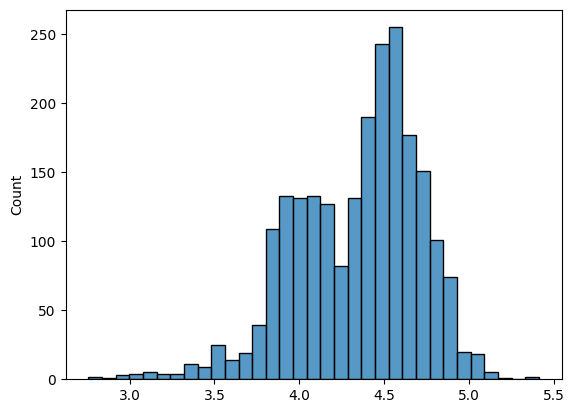

In [ ]:
sns.histplot(x=baseline_model.predict(X_test[y_test == 5.0]))

<Axes: ylabel='Count'>

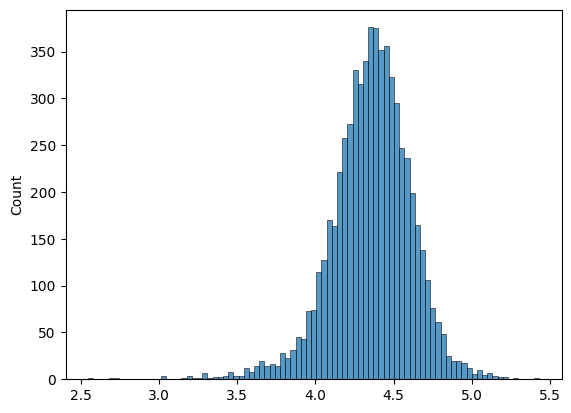

In [ ]:
sns.histplot(x=baseline_model.predict(X_test[y_test == 4.5]))

<Axes: ylabel='Count'>

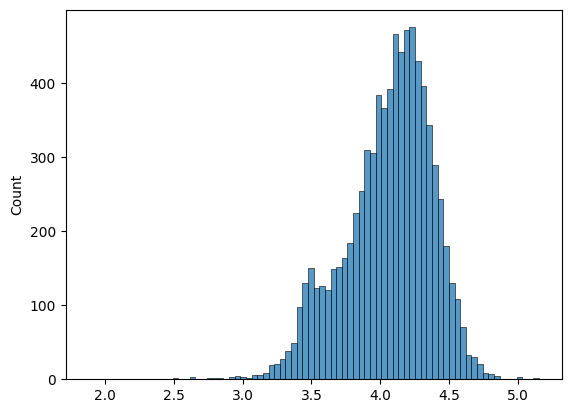

In [ ]:
sns.histplot(x=baseline_model.predict(X_test[y_test == 4.0]))

<Axes: ylabel='Count'>

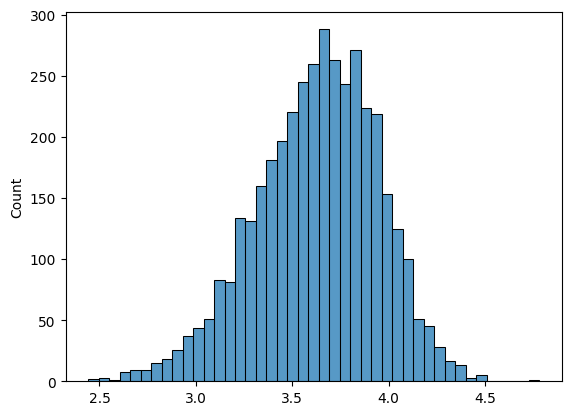

In [ ]:
sns.histplot(x=baseline_model.predict(X_test[y_test == 3.5]))

In [ ]:
print(f"MAE on test {mean_absolute_error(y_test, np.full(y_test.shape, 4))}")
print(f"MSE on test {mean_squared_error(y_test, np.full(y_test.shape, 4))}")
print(f"R2 on test {r2_score(y_test, np.full(y_test.shape, 4))}")

MAE on test 0.4750550732149799
MSE on test 0.45350092868558595
R2 on test -0.0003654883497707928


Mean absolute error on test sample is 0.19. It is acceptable, becouse it lesser than 0,25 and rating values have step with 0,5, so on average with rounding we can predict class.

MAE and MSE on test increases in comparison with train sample. It could be becouse of overfitting.

R2 is 0.811, that means that 81% of variance in predicted sample could be explained by variance in original dataset. This is good result for baseline model.

In [ ]:
t = pd.DataFrame(data={"f": X_train.columns,"w": baseline_model.coef_.round(3)})
t.sort_values(by="w", ascending=False)

f      w
36            Relative_ranking  2.284
27                        Rome  0.422
39  log_days_since_last_review  0.379
10                   Edinburgh  0.304
1                    Amsterdam  0.224
..                         ...    ...
5                   Bratislava -0.174
21                       Milan -0.187
28                   Stockholm -0.207
19                        Lyon -0.250
20                      Madrid -0.364

[76 rows x 2 columns]

<Axes: xlabel='w', ylabel='f'>

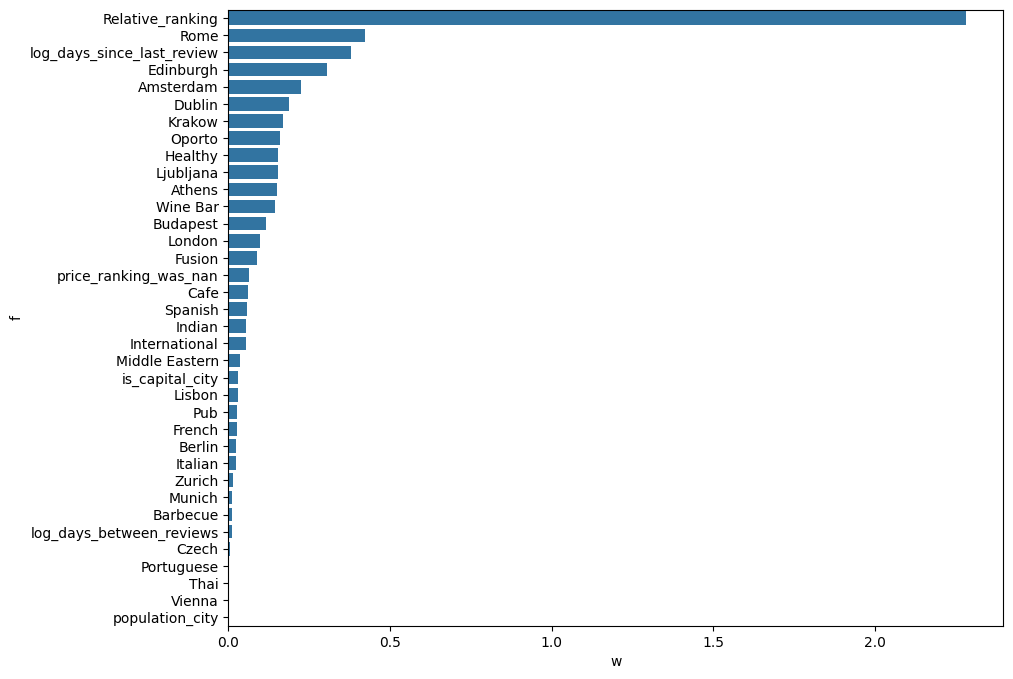

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(data=t[t["w"] >= 0].sort_values(by="w", ascending=False), x="w", y="f")

<Axes: xlabel='w', ylabel='f'>

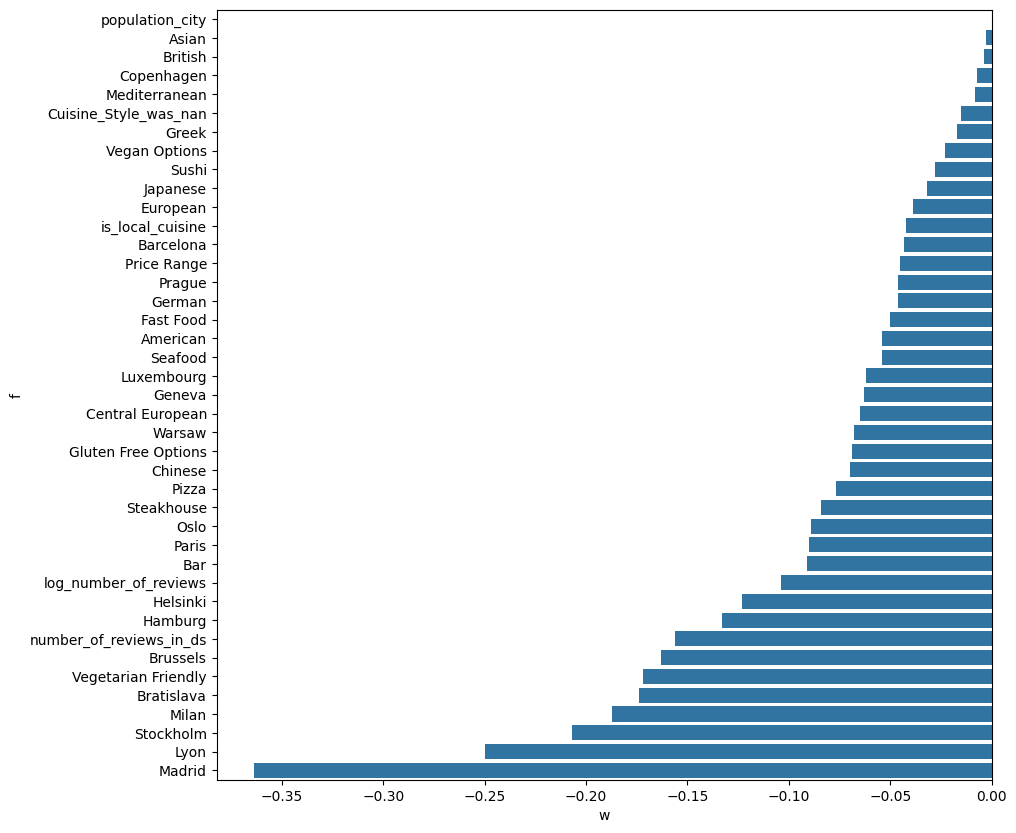

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(data=t[t["w"] <= 0].sort_values(by="w", ascending=False), x="w", y="f")

## Random Forrest Regressor


## First model

In [ ]:
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished


RandomForestRegressor(n_jobs=-1, random_state=42, verbose=1)

In [ ]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.3s finished


In [ ]:
print(f"MAE on train {mean_absolute_error(y_train, y_train_pred)}")
print(f"MSE on train {mean_squared_error(y_train, y_train_pred)}")
print(f"R2 on train {r2_score(y_train, y_train_pred)}")

MAE on train 0.07299978401727861
MSE on train 0.01183433477321814
R2 on train 0.9737861173989638


In [ ]:
print(f"MAE on test {mean_absolute_error(y_test, y_test_pred)}")
print(f"MSE on test {mean_squared_error(y_test, y_test_pred)}")
print(f"R2 on test {r2_score(y_test, y_test_pred)}")

MAE on test 0.197204008466157
MSE on test 0.08537855816163449
R2 on test 0.8116657373172046


Resuls of the model does not improves result from baseline. We could try to change hyperparameters.

<Axes: ylabel='Count'>

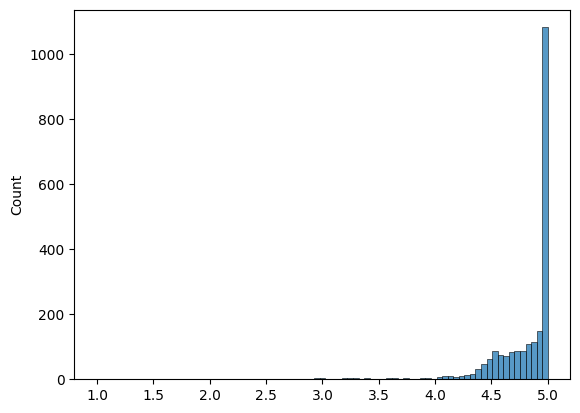

In [ ]:
sns.histplot(x=y_test_pred[y_test == 5.0])

<Axes: ylabel='Count'>

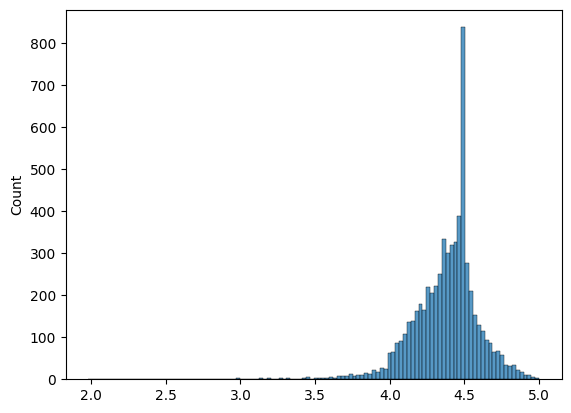

In [ ]:
sns.histplot(x=y_test_pred[y_test == 4.5])

<Axes: ylabel='Count'>

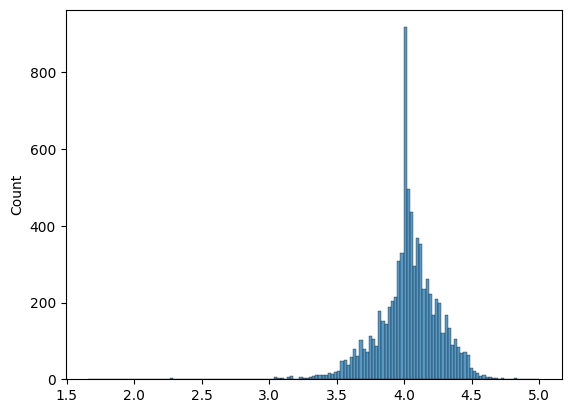

In [ ]:
sns.histplot(x=y_test_pred[y_test == 4.0])

<Axes: ylabel='Count'>

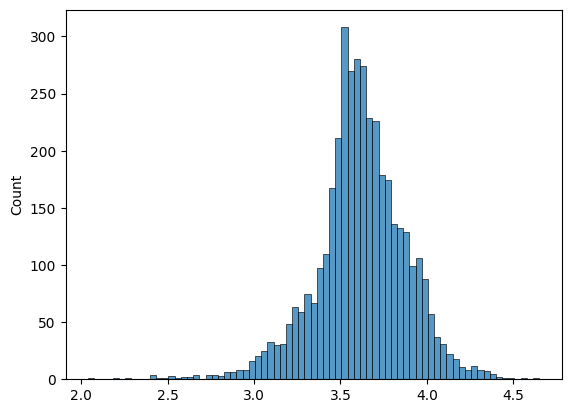

In [ ]:
sns.histplot(x=y_test_pred[y_test == 3.5])

In [ ]:
def local_round(x):
  if x % 0.5 < 0.25:
    return x - x % 0.5
  else:
    return x + 0.5 - x % 0.5

In [ ]:
arr = np.vectorize(local_round)
y_rounded_test = arr(y_test_pred)

In [ ]:
print(f"MAE on test {mean_absolute_error(y_test, y_rounded_test)}")
print(f"MSE on test {mean_squared_error(y_test, y_rounded_test)}")
print(f"R2 on test {r2_score(y_test, y_rounded_test)}")

MAE on test 0.1665370826314198
MSE on test 0.10231739449699798
R2 on test 0.7743008143129326


## Improving

So result on train sample decreases non criticaly. It could be sign of overfitting by other words high variance of prediction. Simpliest way to
reduce variance in ansambles is to increase amount of models(trees)


In [ ]:
import datetime

In [ ]:
amount_of_trees = [50, 100, 150, 200, 250, 300, 400, 500]

In [ ]:
def model_on_hyperparameter(X_train, X_test, y_train, y_test, hp, hp_values, h0_values={"mae": 0.1972, "mse": 0.0853, "r2": 0.8116, "time": 120}):
  params={'n_estimators': 100, 'verbose': 1, 'n_jobs': -1, 'random_state': 42}
  results = {hp: [], "mae": [], "mse": [], "r2": [], "time": [], "improving_mae": [], "improving_mse": [], "improving_r2": [], "improving_time": []}
  for hp_value in hp_values:
    t1 = datetime.datetime.now()
    params[hp] = hp_value
    model_i = RandomForestRegressor(**params)
    model_i.fit(X_train, y_train)
    t2 = datetime.datetime.now()
    y_test_pred = model_i.predict(X_test)
    results[hp].append(hp_value)
    results["mae"].append(mean_absolute_error(y_test, y_test_pred))
    results["mse"].append(mean_squared_error(y_test, y_test_pred))
    results["r2"].append(r2_score(y_test, y_test_pred))
    results["time"].append((t2 - t1).total_seconds())
  results["improving_mae"] = np.round((np.array(results["mae"]) - h0_values["mae"])*(-100) / h0_values["mae"], 2)
  results["improving_mse"] = np.round((np.array(results["mse"]) - h0_values["mse"])*(-100) / h0_values["mse"], 2)
  results["improving_r2"] = np.round((np.array(results["r2"]) - h0_values["r2"])*100 / h0_values["r2"], 2)
  results["improving_time"] = np.round((np.array(results["time"]) - h0_values["time"])*100 / h0_values["time"], 2)
  return pd.DataFrame(results)

In [ ]:
tmp = model_on_hyperparameter(X_train, X_test, y_train, y_test, "n_estimators", amount_of_trees)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   54.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   50.0s
[Parall

In [ ]:
tmp

n_estimators       mae       mse        r2        time  improving_mae  \
0            50  0.198321  0.086515  0.809158   54.706055         -19.11   
1           100  0.197204  0.085379  0.811666  107.150804         -18.44   
2           150  0.197072  0.085190  0.812082  160.182423         -18.36   
3           200  0.196785  0.085004  0.812492  214.185930         -18.19   
4           250  0.196587  0.084726  0.813104  267.677430         -18.07   
5           300  0.196576  0.084696  0.813172  320.971129         -18.06   
6           400  0.196532  0.084610  0.813360  427.090036         -18.04   
7           500  0.196401  0.084522  0.813556  533.140180         -17.96   

   improving_mse  improving_r2  improving_time  
0          15.43          4.50         5370.61  
1          16.54          4.83        10615.08  
2          16.73          4.88        15918.24  
3          16.91          4.93        21318.59  
4          17.18          5.01        26667.74  
5          17.21          5.02        31997.11  
6          17.29          5.04        42609.00  
7          17.38          5.07        53214.02

In [ ]:
features = [5, 9, 15, 25, None]
tmp = model_on_hyperparameter(X_train, X_test, y_train, y_test, "max_features", features)
tmp

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.3s
[Parall

max_features       mae       mse        r2        time  improving_mae  \
0           5.0  0.245398  0.111928  0.753101   21.732937         -24.44   
1           9.0  0.222695  0.095553  0.789222   22.648775         -12.93   
2          15.0  0.208597  0.087632  0.806695   28.604973          -5.78   
3          25.0  0.200014  0.084188  0.814292   40.713679          -1.43   
4           NaN  0.197204  0.085379  0.811666  107.032265          -0.00   

   improving_mse  improving_r2  improving_time  
0         -31.22         -7.21          -81.89  
1         -12.02         -2.76          -81.13  
2          -2.73         -0.60          -76.16  
3           1.30          0.33          -66.07  
4          -0.09          0.01          -10.81